In [2]:
# iterativ thomas 
import rdata

converted = rdata.read_rda(rdata.TESTDATA_PATH / "/Users/alexander/Chalmers/MVEX11-25-18/ERIKA.rds")
# converted

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/rdata/parser/_parser.py:1217: UserWarning: Unknown file type: assumed RDS
  warnings.warn("Unknown file type: assumed RDS")  # noqa: B028
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/rdata/parser/_parser.py:1220: UserWarning: Wrong extension .rda for file in RDS format
  warnings.warn(f"Wrong extension {extension} for file in RDS format")  # noqa: B028
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/rdata/conversion/_conversion.py:856: UserWarning: Missing constructor for R class "unitname". The underlying R object is returned instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/rdata/conversion/_conversion.py:856: UserWarning: Missing constructor for R class "owin". The underlying R object is returned instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3

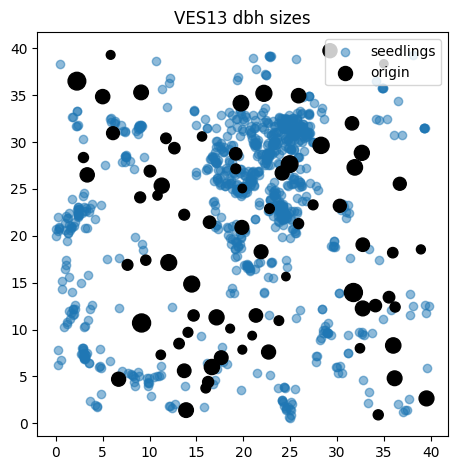

In [3]:
import matplotlib.pyplot as plt 
converted.keys()  # all data names 

converted['VES13'].items()  # what every data name contains 
A = [converted['VES13']['large']['x'], converted['VES13']['large']['y'], converted['VES13']['large']['dbh']]

fig, ax = plt.subplots()
ax.scatter(converted['VES13']['small']['x'], converted['VES13']['small']['y'], alpha=0.5, label='seedlings')
ax.scatter(A[0], A[1], s=A[2]*5, color='black', label='origin')

ax.set_title('VES13 dbh sizes')
ax.legend(loc='best')
ax.set_aspect('equal')
fig.tight_layout()

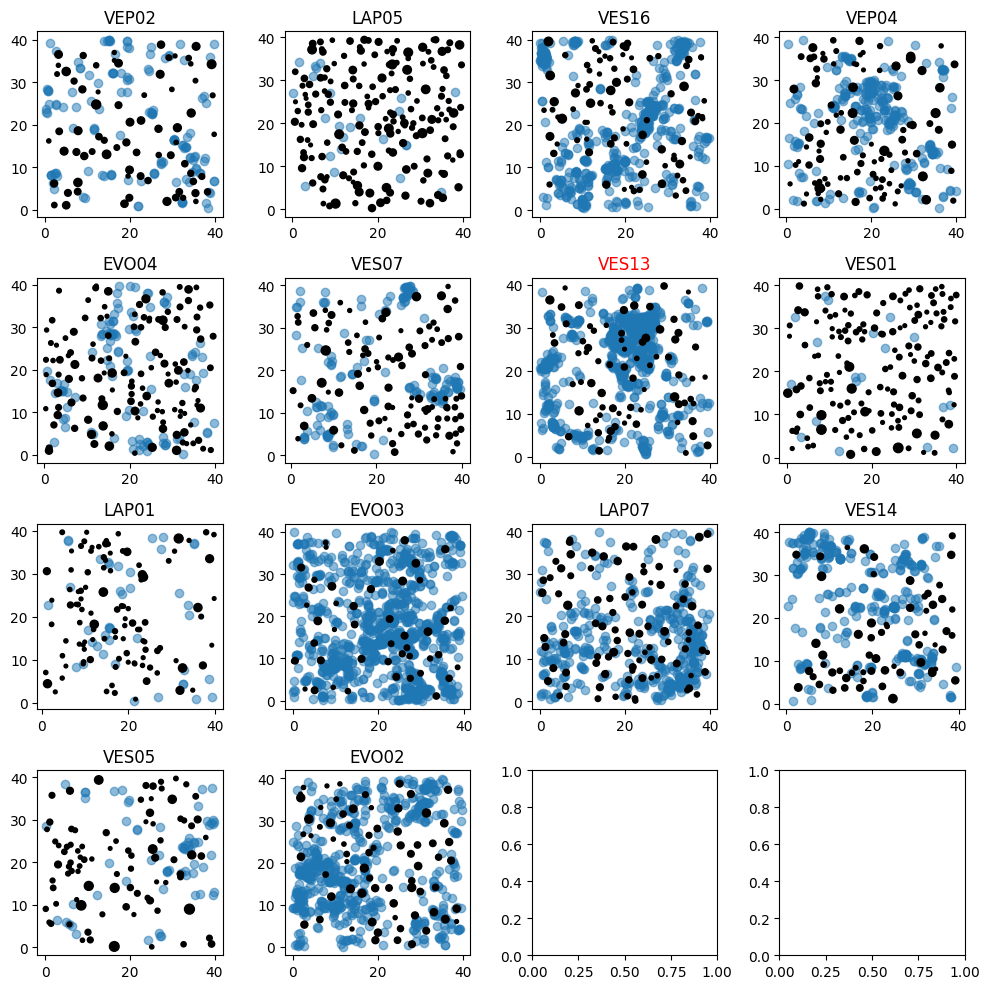

In [4]:
n = len(converted.keys())

fig2, ax2 = plt.subplots(4,4, figsize=(10,10))

for i ,name in enumerate(converted.keys()):
    
    c = divmod(i,4)
    # print(i,name)
    dbh = [converted[name]['large']['x'], converted[name]['large']['y'], converted[name]['large']['dbh']]
    
    ax2[c].scatter(converted[name]['small']['x'], converted[name]['small']['y'], alpha=.5)
    ax2[c].scatter(dbh[0], dbh[1], s=dbh[2], color='black')
    ax2[c].set_title(f'{name}')  
    if name == 'VES13':
        ax2[c].set_title(f'{name}',color='red')
    
converted['VES13'].keys()
fig2.tight_layout()

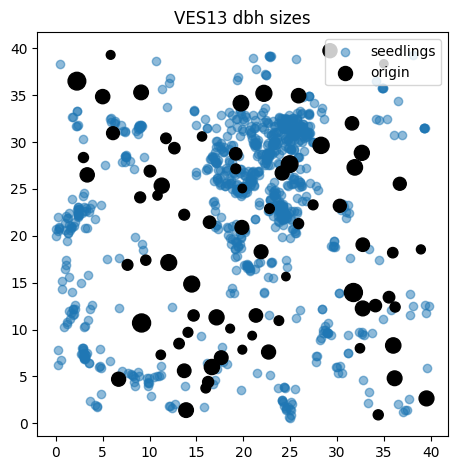

In [5]:
n = len(converted.keys())
fig ,ax  = plt.subplots()

ax.scatter(converted['VES13']['small']['x'], converted['VES13']['small']['y'], alpha=0.5, label='seedlings')
ax.scatter(A[0], A[1], s=A[2]*5, color='black', label='origin')

ax.set_title('VES13 dbh sizes')
ax.legend(loc='best')
ax.set_aspect('equal')
fig.tight_layout()

In [6]:
import numpy as np 
xy_c = np.array([converted['VES13']['small']['x'], converted['VES13']['small']['y']])

xy_p = np.array([converted['VES13']['large']['x'], converted['VES13']['large']['y']])

from numpy import linalg as LA
import heapq
r_density_survive = 0.1 # some distance 

origin_point = xy_c
count_inside_rcircle = LA.norm((xy_c[0] - origin_point), axis=0) <= r_density_survive


count_all = np.array([np.sum(LA.norm((xy_c - origin_p), axis=0) <= r_density_survive) for origin_p in xy_c])
count_all = count_all -1  # exclude self
count_survive = len(xy_c)*0.1

count_all

survive_point = heapq.nlargest(int(count_survive), enumerate(count_all.astype(int)), key=lambda x: x[1])

survive_point

[]

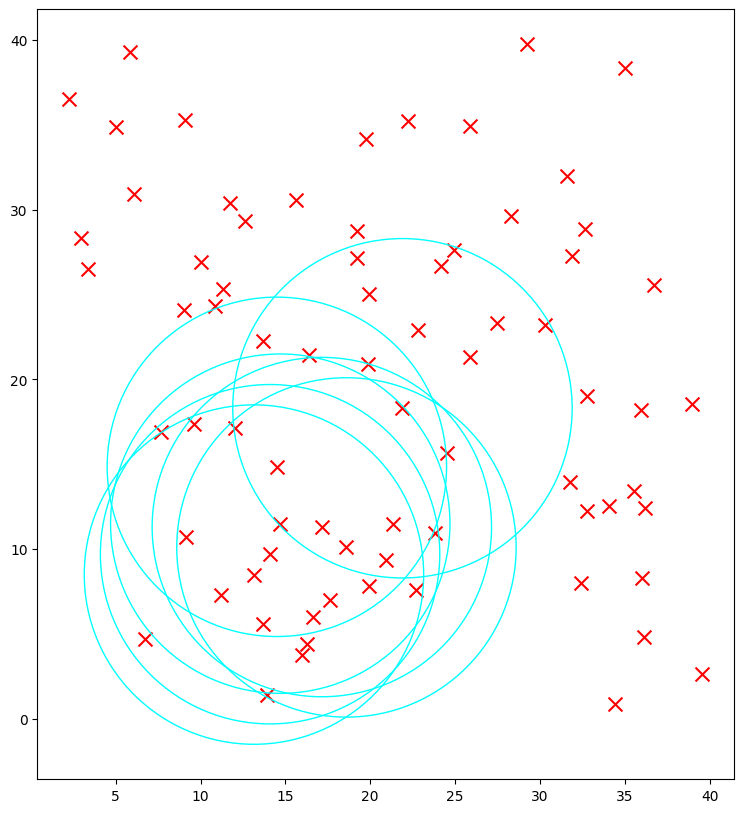

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 

xy_c = np.array([converted['VES13']['small']['x'], converted['VES13']['small']['y']])
xy_p = np.array([converted['VES13']['large']['x'], converted['VES13']['large']['y']])
xy_child = np.vstack([xy_c[0], xy_c[1]]).T
xy_parent = np.vstack([xy_p[0], xy_p[1]]).T

# origin_p = xy_c[:,0]
# print(origin_p)

# After data fixed 
r_density_survive = 10 # some distance 


count_all = np.array([np.sum(LA.norm((xy_parent - origin_p), axis=1) <= r_density_survive) for origin_p in xy_parent])  # take points that survive 
count_all = count_all -1  # exclude self
count_survive = len(xy_parent)*0.1  # antal % som överlever 

survive_point = heapq.nlargest(int(count_survive), enumerate(count_all.astype(int)), key=lambda x: x[1])
index=np.array(survive_point)[:,0]

import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 10))
# plt.scatter(xy_child[:, 0], xy_child[:, 1], color='blue', alpha=0.5)
plt.scatter(xy_parent[:, 0], xy_parent[:, 1], color='red', marker='x', s=100)
# plt.scatter(n2[:, 0], n2[:, 1], color='black', s=100)

fig = plt.gcf()
ax = fig.gca()

for i in index:
    circle2 = plt.Circle(xy_parent[i], r_density_survive, color='cyan', lw=1, fill=False)
    ax.add_patch(circle2)

ax.set_aspect('equal', 'box')

plt.show()

In [117]:
print(count_all)

print(heapq.nlargest(int(len(xy_parent)*0.1), count_all))

survive_point = heapq.nlargest(int(count_survive), enumerate(count_all.astype(int)), key=lambda x: x[1])

survive_point

[ 5  8  9 11 13  9  4 17 16 11 18 14 14 18 18 17 16  9 11 17 18 18 18 20
 22 21 22 20 19 18 17 17 18 18 18 21 18 20 18 18 20 19 11 10 16 16 16 15
 14 18 19 18 11 11 13 16 12 16 12  4  4  8 10 12 10 10 10 12 14  9 11  4
  4  9]
[22, 22, 21, 21, 20, 20, 20]


[(24, 22), (26, 22), (25, 21), (35, 21), (23, 20), (27, 20), (37, 20)]

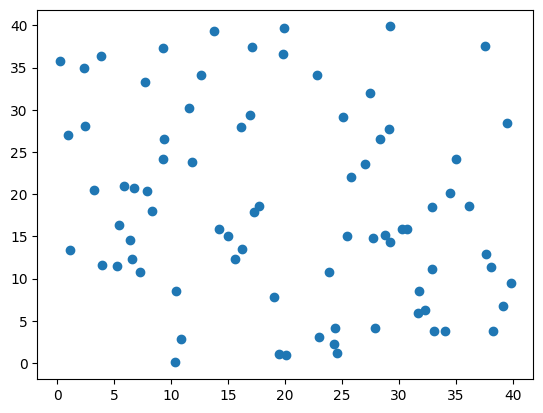

In [11]:
rng = np.random.default_rng()

n_parent = len(xy_parent)  # original parent have 74
size = rng.poisson(n_parent)  # random new n_parents 
lam = 5
n_children = rng.poisson(lam=lam, size=size)  # random children per parent, after lam number

len(n_children), n_children

# set parent location 
x_parent = rng.uniform(0,40, size)
y_parent = rng.uniform(0,40, size)

plt.scatter(x_parent, y_parent)

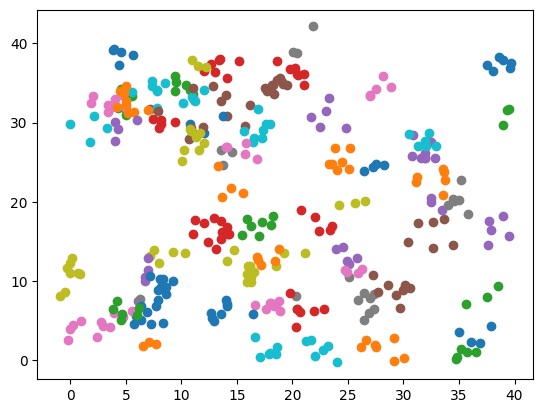

In [119]:
# first children 
for i in range(size):
    x_child = rng.normal(x_parent[i], size=n_children[i])
    y_child = rng.normal(y_parent[i], size=n_children[i])
    plt.scatter(x_child, y_child)



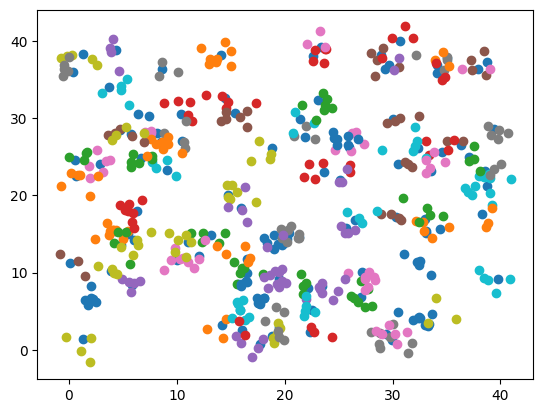

In [120]:
# iteration 1 

def iterative_poisson(size):
    """_summary_

    Args:
        size (int): Number of parents 

    Returns:
        size (int): Returns new size of parents 
    """

    n_parent = size  # New parent size inspired from previous 
    size = rng.poisson(n_parent)  # random new n_parents 
    lam = 5
    n_children = rng.poisson(lam=lam, size=size)  # random children per parent, after lam number
    
    
    save_percent = 0.1 
    

    # set parent location 
    x_parent = rng.uniform(0,40, size)
    y_parent = rng.uniform(0,40, size)

    plt.scatter(x_parent, y_parent)
    
    for i in range(size):
        x_child = rng.normal(x_parent[i], size=n_children[i])
        y_child = rng.normal(y_parent[i], size=n_children[i])
        plt.scatter(x_child, y_child)
    return size

size = iterative_poisson(size)

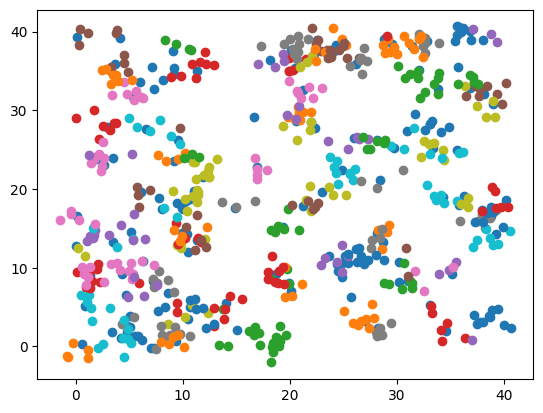

In [121]:
size = iterative_poisson(size)

(0.0, 40.0)

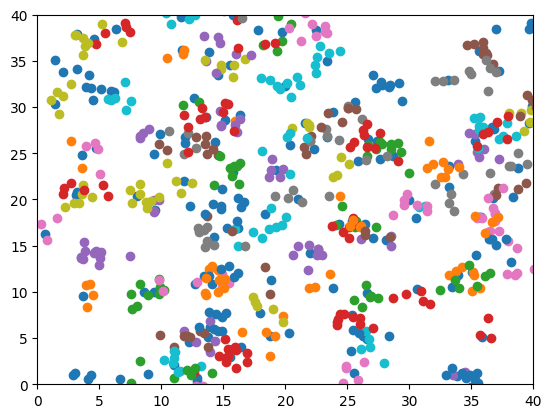

In [122]:
# iter = 3, only on parent size. No surviveability 
size = iterative_poisson(size)
plt.xlim((0,40))
plt.ylim((0,40))

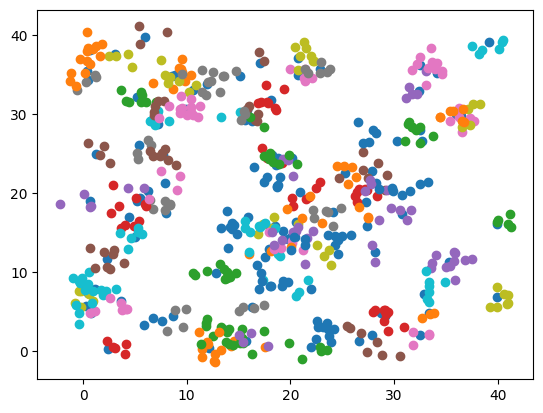

In [123]:
# new model where children survive 
def iterative_poisson_survive(size):
    """_summary_

    Args:
        size (int): Number of parents 

    Returns:
        size (int): Returns new size of parents 
    """

    n_parent = size  # New parent size inspired from previous 
    size = rng.poisson(n_parent)  # random new n_parents 
    lam = 5
    n_children = rng.poisson(lam=lam, size=size)  # random children per parent, after lam number
    
    save_percent = 0.1

    # set parent location 
    x_parent = rng.uniform(0,40, size)
    y_parent = rng.uniform(0,40, size)

    plt.scatter(x_parent, y_parent)
    
    for i in range(size):
        x_child = rng.normal(x_parent[i], size=n_children[i])
        y_child = rng.normal(y_parent[i], size=n_children[i])
        plt.scatter(x_child, y_child)
        
        
    xy_parent = np.vstack([x_parent, y_parent]).T
    
    r_density_survive = 10 # some distance

    count_all = np.array([np.sum(LA.norm((xy_parent - origin_p), axis=1) <= r_density_survive) for origin_p in xy_parent])  # take points that survive 
    count_all = count_all -1  # exclude self
    count_survive = len(xy_parent)*0.1  # antal % som överlever

    survive_point = heapq.nlargest(int(count_survive), enumerate(count_all.astype(int)), key=lambda x: x[1])
    index=np.array(survive_point)[:,0]
    
    
    return size

size = iterative_poisson_survive(size)

surive [(79, 29), (89, 29), (3, 28), (4, 28), (11, 28), (18, 28), (61, 28), (71, 28), (73, 28), (20, 27), (23, 27)]
new_parent 7


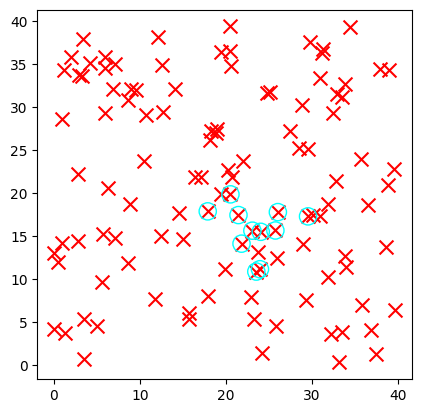

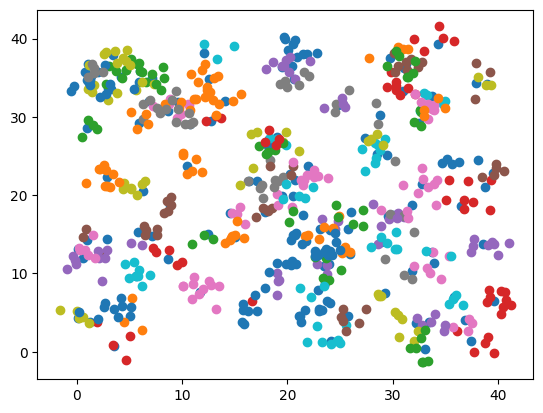

In [124]:
# iteration with survive 

def iterative_poisson_survive(size, survive_rate=0.1):
    """_summary_

    Args:
        size (int): Number of parents 

    Returns:
        size (int): Returns new size of parents 
    """

    n_parent = size  # New parent size inspired from previous 
    size = rng.poisson(n_parent)  # random new n_parents 
    lam = 5
    n_children = rng.poisson(lam=lam, size=size)  # random children per parent, after lam number
    
    
    # set parent location 
    x_parent = rng.uniform(0,40, size)
    y_parent = rng.uniform(0,40, size)
    
    # xy_p = np.array(x_parent, y_parent)
    # xy_parent = np.vstack([xy_p[0], xy_p[1]]).T
    xy_parent = np.vstack([x_parent, y_parent]).T
    
    r_density_survive = 10 # some distance 

    count_all = np.array([np.sum(LA.norm((xy_parent - origin_p), axis=1) <= r_density_survive) for origin_p in xy_parent])  # take points that survive 
    count_all = count_all -1  # exclude self
    count_survive = len(xy_parent)*0.1  # antal % som överlever

    survive_point = heapq.nlargest(int(count_survive), enumerate(count_all.astype(int)), key=lambda x: x[1])
    index=np.array(survive_point)[:,0]
    
    print('surive', survive_point)
    new_parent = rng.poisson(10)  # to compensate for 10% 
    print('new_parent', new_parent)
    
    # new parents genereated, also want to keep old points <- this does not work 
    # history_points = [xy_parent]
    # for i in range(len(survive_point)):
    #     # new_parent_size = rng.poisson(10)
    #     new_parent = rng.poisson(10,size=new_parent)  # to compensate for 10 % 
    #     print('rng', new_parent)

    import matplotlib.pyplot as plt 

    fig, ax = plt.subplots()
    # ax.figure(figsize=(10, 10))
    # plt.scatter(xy_child[:, 0], xy_child[:, 1], color='blue', alpha=0.5)
    ax.scatter(xy_parent[:, 0], xy_parent[:, 1], color='red', marker='x', s=100)
    # plt.scatter(n2[:, 0], n2[:, 1], color='black', s=100)

    fig = plt.gcf()
    ax = fig.gca()

    for i in index:
        circle2 = plt.Circle(xy_parent[i], r_density_survive/10, color='cyan', lw=1, fill=False)
        ax.add_patch(circle2)

    ax.set_aspect('equal', 'box')
    
    fig2, ax2 = plt.subplots()
    ax2.scatter(x_parent, y_parent)
    for i in range(size):
        x_child = rng.normal(x_parent[i], size=n_children[i])
        y_child = rng.normal(y_parent[i], size=n_children[i])
        ax2.scatter(x_child, y_child)
    # fig2.show()
    
    return size

size = iterative_poisson_survive(size)

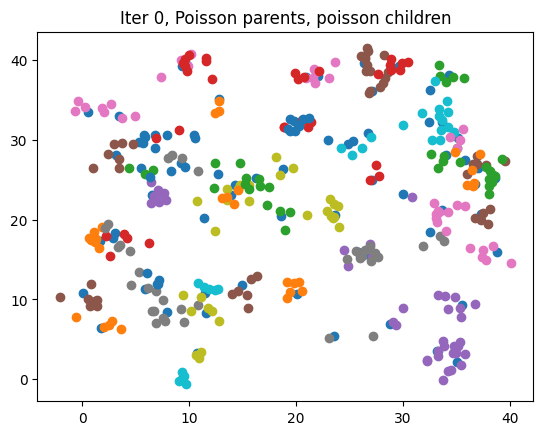

In [125]:
# Iteration 0, get 10% of children
# variables
# xy_parent:                    all parent points from that iter 
# x_history, y_history:         stores x,y position from generated children 
# 
import matplotlib.pyplot as plt 

# xy_c = np.array([converted['VES13']['small']['x'], converted['VES13']['small']['y']])
xy_p = np.array([converted['VES13']['large']['x'], converted['VES13']['large']['y']])
# xy_child = np.vstack([xy_c[0], xy_c[1]]).T
xy_parent = np.vstack([xy_p[0], xy_p[1]]).T  # combine points into pattern we use 



# math parameter 
size = xy_p.shape[1]  # self contained data, just load data into xy_p 
n_parent = size  # New parent size inspired from previous 
size = rng.poisson(n_parent)  # random new n_parents 
lam = 5
n_children = rng.poisson(lam=lam, size=size)  # random children per parent, after lam number
save_percent = 0.1 

# Create new parents, iter0 from poisson(size parent points from data)
x_parent = rng.uniform(0,40, size)  # becomes new_ x,y later 
y_parent = rng.uniform(0,40, size)

plt.scatter(x_parent, y_parent)

# log of all child points, not ideal but works. Addition save all points, remove for only childs!
x_history = [x_parent]  
y_history = [y_parent]


for i in range(size):
    x_child = rng.normal(x_parent[i], size=n_children[i])
    y_child = rng.normal(y_parent[i], size=n_children[i])
    # print(len(x_child), len(y_child))
    x_history.append(x_child)
    y_history.append(y_child)
    plt.scatter(x_child, y_child)
    
plt.title('Iter 0, Poisson parents, poisson children');


404


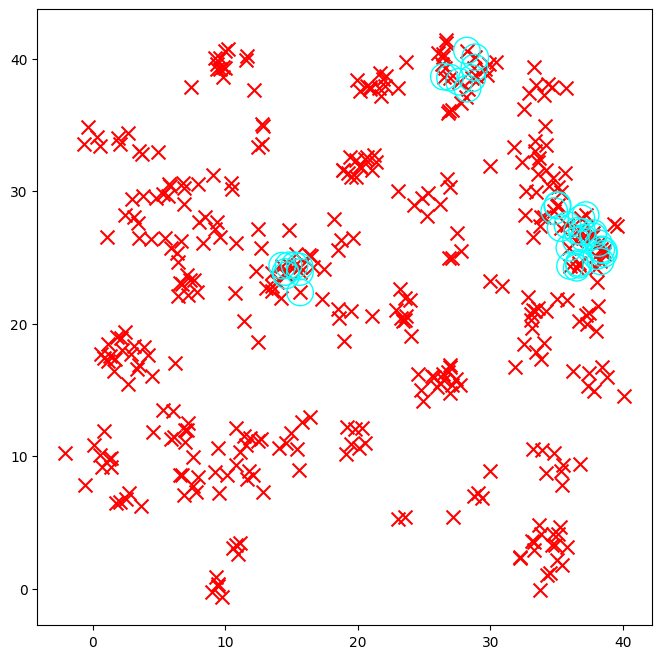

In [126]:
# Iter 0, what points to save After data fixed 
## Version where all points are combined to pick the most dense area and save 10% > change lam to be samller 
import matplotlib.pyplot as plt 

outx = np.concatenate(x_history).ravel().tolist() # special way to get a list from array
outy = np.concatenate(y_history).ravel().tolist()
all_points = np.vstack([outx, outy]).T


r_density_survive = 3  # some distance 

count_all = np.array([np.sum(LA.norm((all_points - origin_p), axis=1) <= r_density_survive) for origin_p in all_points])  # take points that survive 
count_all = count_all - 1  # exclude self
print(all_points.shape[0])
count_survive = all_points.shape[0]*0.1  # antal % som överlever
survive_point = heapq.nlargest(int(count_survive), enumerate(count_all.astype(int)), key=lambda x: x[1])
index=np.array(survive_point)[:,0]


plt.figure(figsize=(8, 8))
plt.scatter(all_points[:, 0], all_points[:, 1], color='red', marker='x', s=100)

fig = plt.gcf()
ax = fig.gca()

for i in index:
    circle2 = plt.Circle(all_points[i], r_density_survive/3, color='cyan', lw=1, fill=False)
    ax.add_patch(circle2)

ax.set_aspect('equal', 'box')

plt.show()

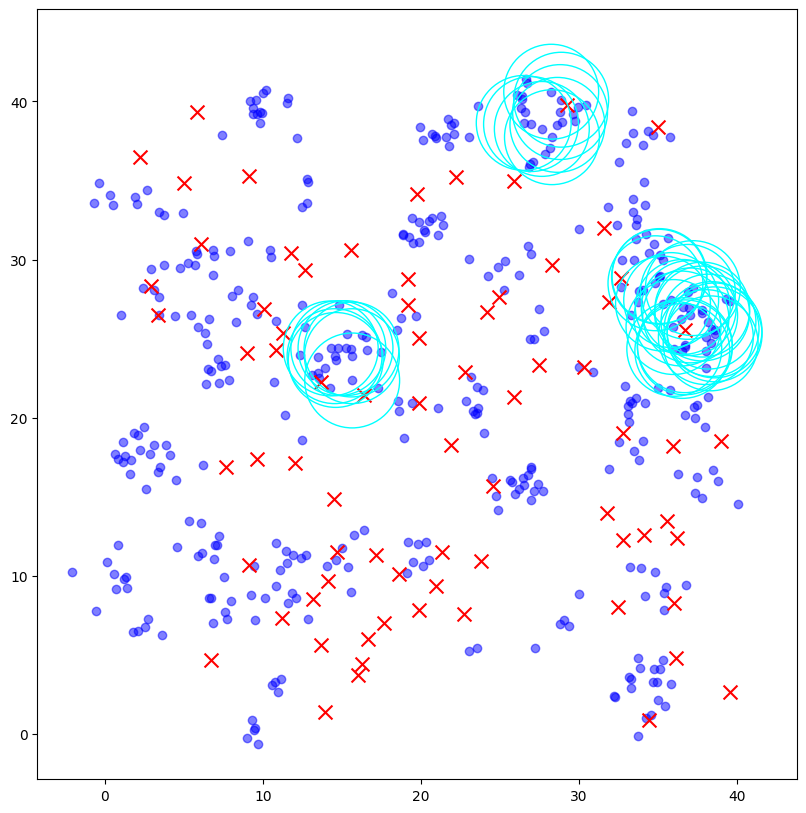

In [127]:
# Does the same thing, shows the difference between child points and parents points for new plot 
# outx = np.concatenate(x_history).ravel().tolist() # special way to get a list from array
# outy = np.concatenate(y_history).ravel().tolist()
# all_points = np.vstack([outx, outy]).T

r_density_survive = 3  # some distance, this one is important to capture cluster 

count_all = np.array([np.sum(LA.norm((all_points - origin_p), axis=1) <= r_density_survive) for origin_p in all_points])  # take points that survive 
count_all = count_all - 1  # exclude self
count_survive = all_points[:,1].size*0.1  # antal % som överlever

survive_point = heapq.nlargest(int(count_survive), enumerate(count_all.astype(int)), key=lambda x: x[1])
index=np.array(survive_point)[:,0]

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(all_points[:, 0], all_points[:, 1], color='blue', alpha=0.5)
ax.scatter(xy_parent[:, 0], xy_parent[:, 1], color='red', marker='x', s=100)


fig = plt.gcf()
ax = fig.gca()

for i in index:
    circle2 = plt.Circle(all_points[i], r_density_survive, color='cyan', lw=1, fill=False)
    ax.add_patch(circle2)

ax.set_aspect('equal', 'box')

plt.show()


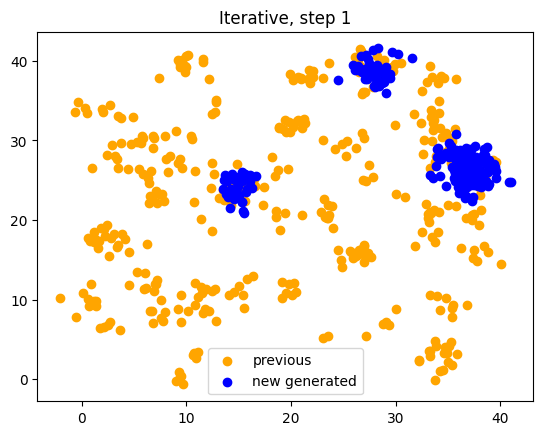

In [128]:
# all_children[index].shape

# x_new_10_parent = [x_parent, all_children[index][:,0]]  # redundent since have them combined above
# y_new_10_parent = [y_parent, all_children[index][:,1]]
x_new_10_parent = [all_points[index][:,0]]  # picks the index points to generate new children
y_new_10_parent = [all_points[index][:,1]]

outx = np.concatenate(x_new_10_parent).ravel().tolist()
outy = np.concatenate(y_new_10_parent).ravel().tolist()
new_x = np.array(outx)
new_y = np.array(outy)

plt.scatter(all_points[:,0], all_points[:,1], color='orange', label='previous')

n_children = rng.poisson(lam=lam, size=new_y.shape[0])  # lam = 5 change above, gets new children for new parents 
for i in range(new_y.shape[0]):
    x_child = rng.normal(new_x[i], size=n_children[i])
    y_child = rng.normal(new_y[i], size=n_children[i])
    x_history.append(x_child)  # add the children to x_history/y_history
    y_history.append(y_child)
    if i == 0:
        plt.scatter(x_child, y_child, color='blue', label='new generated')  # only one legend
    else:
        plt.scatter(x_child, y_child, color='blue')

plt.title('Iterative, step 1')
plt.legend(loc='best')

plt.savefig('/Users/alexander/Chalmers/MVEX11-25-18/python-fig/iterative-model.png', format='png', bbox_inches='tight')
fig.savefig('/Users/alexander/Chalmers/MVEX11-25-18/python-fig/inspiration-iterative.png', format='png', bbox_inches='tight')  # prior inspiration 
# fig.savefig('/Users/alexander/Chalmers/MVEX11-25-18/python-fig/iterative-model.eps', format='eps', bbox_inches='tight')

616


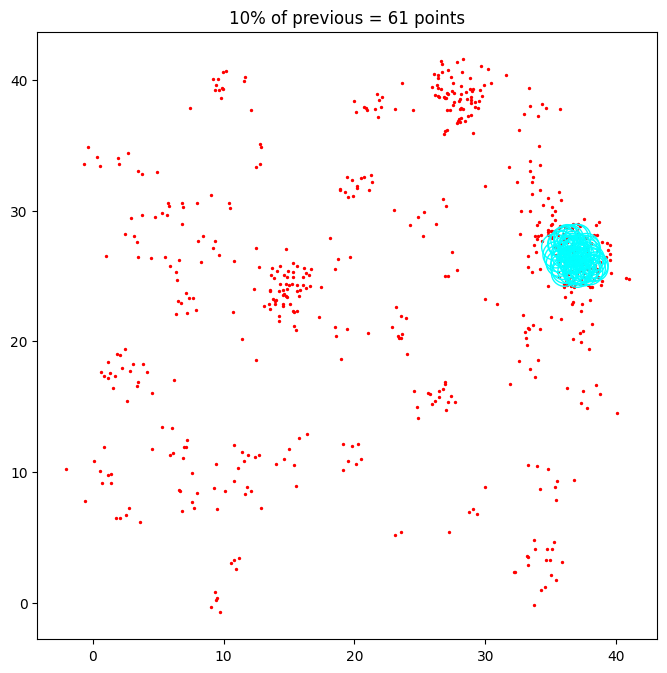

In [129]:
# Iter 1, copy paste, all points points saved in x,y _history (grows)
## Version where all points are combined to pick the most dense area and save 10% > change lam to be samller 
import matplotlib.pyplot as plt 

outx = np.concatenate(x_history).ravel().tolist() # special way to get a list from array
outy = np.concatenate(y_history).ravel().tolist()
all_points = np.vstack([outx, outy]).T


r_density_survive = 3  # some distance 

count_all = np.array([np.sum(LA.norm((all_points - origin_p), axis=1) <= r_density_survive) for origin_p in all_points])  # take points that survive 
count_all = count_all - 1  # exclude self
print(all_points.shape[0])
count_survive = all_points.shape[0]*0.1  # antal % som överlever
survive_point = heapq.nlargest(int(count_survive), enumerate(count_all.astype(int)), key=lambda x: x[1])
index=np.array(survive_point)[:,0]


plt.figure(figsize=(8, 8))
plt.scatter(all_points[:, 0], all_points[:, 1], color='red', marker='o', s=2)

fig = plt.gcf()
ax = fig.gca()

for i in index:
    circle2 = plt.Circle(all_points[i], r_density_survive/3, color='cyan', lw=1, fill=False)
    ax.add_patch(circle2)

ax.set_aspect('equal', 'box')
ax.set_title(f'10% of previous = {index.shape[0]} points')  # use to deduce what lambda should be 

plt.show()

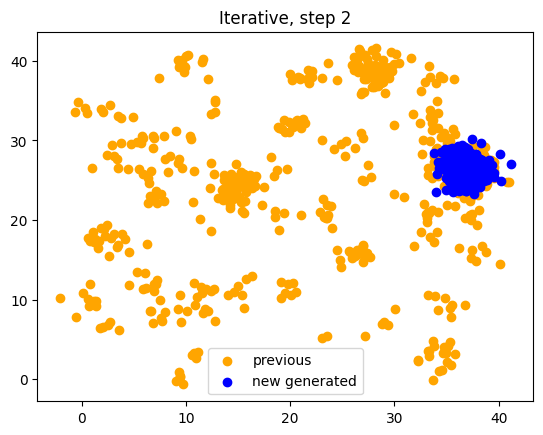

In [130]:
# iteration 2, get survivors from previous iteration 
# all_children[index].shape

# x_new_10_parent = [x_parent, all_children[index][:,0]]  # redundent since have them combined above
# y_new_10_parent = [y_parent, all_children[index][:,1]]
x_new_10_parent = [all_points[index][:,0]]  # picks the index points to generate new children
y_new_10_parent = [all_points[index][:,1]]

outx = np.concatenate(x_new_10_parent).ravel().tolist()
outy = np.concatenate(y_new_10_parent).ravel().tolist()
new_x = np.array(outx)
new_y = np.array(outy)

plt.scatter(all_points[:,0], all_points[:,1], color='orange', label='previous')

n_children = rng.poisson(lam=lam, size=new_y.shape[0])  # lam = 5 change above, gets new children for new parents 
for i in range(new_y.shape[0]):
    x_child = rng.normal(new_x[i], size=n_children[i])
    y_child = rng.normal(new_y[i], size=n_children[i])
    x_history.append(x_child)  # add the children to x_history/y_history
    y_history.append(y_child)
    if i == 0:
        plt.scatter(x_child, y_child, color='blue', label='new generated')  # only one legend
    else:
        plt.scatter(x_child, y_child, color='blue')

plt.title('Iterative, step 2')
plt.legend(loc='best')

plt.savefig('/Users/alexander/Chalmers/MVEX11-25-18/python-fig/iterative2-model.png', format='png', bbox_inches='tight')
fig.savefig('/Users/alexander/Chalmers/MVEX11-25-18/python-fig/inspiration2-iterative.png', format='png', bbox_inches='tight')  # prior inspiration 
# fig.savefig('/Users/alexander/Chalmers/MVEX11-25-18/python-fig/iterative-model.eps', format='eps', bbox_inches='tight')

923


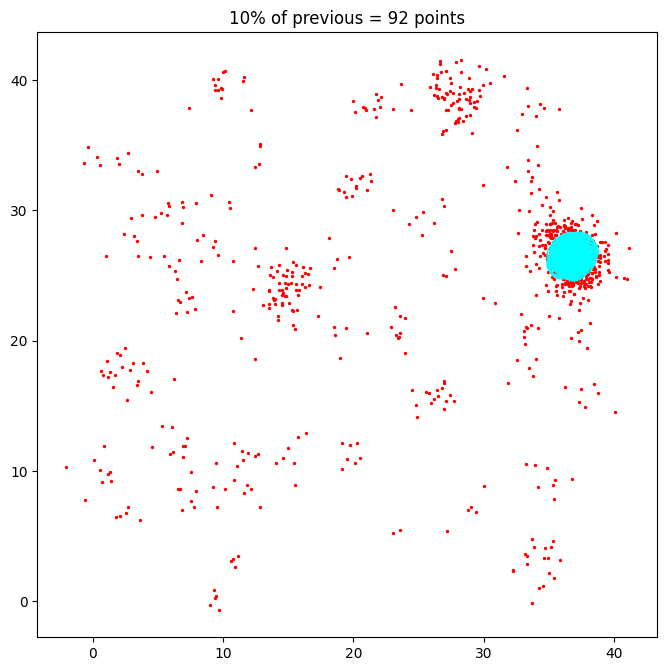

In [131]:
# Get survivors , copy paste, all points points saved in x,y _history (grows)
## Version where all points are combined to pick the most dense area and save 10% > change lam to be samller 

outx = np.concatenate(x_history).ravel().tolist() # special way to get a list from array
outy = np.concatenate(y_history).ravel().tolist()
all_points = np.vstack([outx, outy]).T


r_density_survive = 3  # some distance 

count_all = np.array([np.sum(LA.norm((all_points - origin_p), axis=1) <= r_density_survive) for origin_p in all_points])  # take points that survive 
count_all = count_all - 1  # exclude self
print(all_points.shape[0]) # should grow, do point accounting
count_survive = all_points.shape[0]*0.1  # antal % som överlever
survive_point = heapq.nlargest(int(count_survive), enumerate(count_all.astype(int)), key=lambda x: x[1])
index=np.array(survive_point)[:,0]


plt.figure(figsize=(8, 8))
plt.scatter(all_points[:, 0], all_points[:, 1], color='red', marker='o', s=2)

fig = plt.gcf()
ax = fig.gca()

for i in index:
    circle2 = plt.Circle(all_points[i], r_density_survive/3, color='cyan', lw=1, fill=False)
    ax.add_patch(circle2)

ax.set_aspect('equal', 'box')
ax.set_title(f'10% of previous = {index.shape[0]} points')  # use to deduce what lambda should be 

plt.show()

92


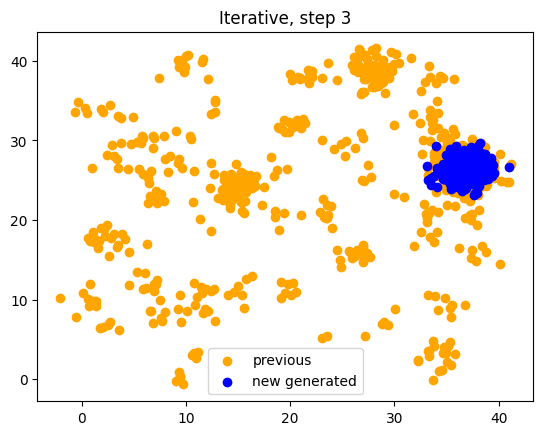

In [132]:
# iteration 3, get survivors from previous iteration 
x_new_10_parent = [all_points[index][:,0]]  # picks the index points to generate new children
y_new_10_parent = [all_points[index][:,1]]

outx = np.concatenate(x_new_10_parent).ravel().tolist()
outy = np.concatenate(y_new_10_parent).ravel().tolist()
new_x = np.array(outx)
new_y = np.array(outy)

plt.scatter(all_points[:,0], all_points[:,1], color='orange', label='previous')

print(new_y.shape[0])
n_children = rng.poisson(lam=lam, size=new_y.shape[0])  # lam = 5 change above, gets new children for new parents 
for i in range(new_y.shape[0]):
    x_child = rng.normal(new_x[i], size=n_children[i])
    y_child = rng.normal(new_y[i], size=n_children[i])
    x_history.append(x_child)  # add the children to x_history/y_history
    y_history.append(y_child)
    if i == 0:
        plt.scatter(x_child, y_child, color='blue', label='new generated')  # only one legend
    else:
        plt.scatter(x_child, y_child, color='blue')

plt.title('Iterative, step 3')
plt.legend(loc='best')

plt.savefig('/Users/alexander/Chalmers/MVEX11-25-18/python-fig/iterative3-model.png', format='png', bbox_inches='tight')
fig.savefig('/Users/alexander/Chalmers/MVEX11-25-18/python-fig/inspiration3-iterative.png', format='png', bbox_inches='tight')  # prior inspiration 
# fig.savefig('/Users/alexander/Chalmers/MVEX11-25-18/python-fig/iterative-model.eps', format='eps', bbox_inches='tight')

In [10]:
# Attempt to function code 

# Iteration 0, get 10% of children
# variables
# xy_parent:                    all parent points from that iter 
# x_history, y_history:         stores x,y position from generated children 
# 
import matplotlib.pyplot as plt 
import numpy as np 
#load data 
xy_p = np.array([converted['VES13']['large']['x'], converted['VES13']['large']['y']])
# start distribution 
xy_parent = np.vstack([xy_p[0], xy_p[1]]).T  # combine points into pattern we use 
# Create new parents, iter0 from poisson(size parent points from data)
x_parent = rng.uniform(0,40, size)  # becomes new_ x,y later 
y_parent = rng.uniform(0,40, size)

def iter_poisson(outx, outy, lam):
    all_points = np.vstack([outx, outy]).T
    x_history=[outx]
    y_history=[outy]

    r_density_survive = 3  # some distance 

    count_all = np.array([np.sum(LA.norm((all_points - origin_p), axis=1) <= r_density_survive) for origin_p in all_points])  # take points that survive 
    count_all = count_all - 1  # exclude self
    print(all_points.shape[0]) # should grow, do point accounting
    count_survive = all_points.shape[0]*0.1  # antal % som överlever
    survive_point = heapq.nlargest(int(count_survive), enumerate(count_all.astype(int)), key=lambda x: x[1])
    index=np.array(survive_point)[:,0]


    plt.figure(figsize=(8, 8))
    plt.scatter(all_points[:, 0], all_points[:, 1], color='red', marker='o', s=2)

    fig = plt.gcf()
    ax = fig.gca()

    for i in index:
        circle2 = plt.Circle(all_points[i], r_density_survive/3, color='cyan', lw=1, fill=False)
        ax.add_patch(circle2)

    ax.set_aspect('equal', 'box')
    ax.set_title(f'10% of previous = {index.shape[0]} points')  # use to deduce what lambda should be 

    plt.show()
    
    # broadcast the new points into next model 
    x_new_10_parent = [all_points[index][:,0]]  # picks the index points to generate new children
    y_new_10_parent = [all_points[index][:,1]]

    outx = np.concatenate(x_new_10_parent).ravel().tolist()
    outy = np.concatenate(y_new_10_parent).ravel().tolist()
    new_x = np.array(outx)
    new_y = np.array(outy)
    
    plt.scatter(all_points[:,0], all_points[:,1], color='orange', label='previous')

    print(new_y.shape[0])
    n_children = rng.poisson(lam=lam, size=new_y.shape[0])  # lam = 5 change above, gets new children for new parents 
    for i in range(new_y.shape[0]):
        x_child = rng.normal(new_x[i], size=n_children[i])
        y_child = rng.normal(new_y[i], size=n_children[i])
        x_history.append(x_child)  # add the children to x_history/y_history
        y_history.append(y_child)
        if i == 0:
            plt.scatter(x_child, y_child, color='blue', label='new generated')  # only one legend
        else:
            plt.scatter(x_child, y_child, color='blue')

    plt.title('Iterative, step 3')
    plt.legend(loc='best')
    
    outx = np.concatenate(x_history).ravel().tolist() # special way to get a list from array
    outy = np.concatenate(y_history).ravel().tolist()
    
    return outx, outy
    


# math parameter 
size = xy_p.shape[1]  # self contained data, just load data into xy_p 
n_parent = size  # New parent size inspired from previous 
size = rng.poisson(n_parent)  # random new n_parents 
lam = 5
n_children = rng.poisson(lam=lam, size=size)  # random children per parent, after lam number
save_percent = 0.1 



plt.scatter(x_parent, y_parent)

# log of all child points, not ideal but works. Addition save all points, remove for only childs!
x_history = [x_parent]  
y_history = [y_parent]


for i in range(size):
    x_child = rng.normal(x_parent[i], size=n_children[i])
    y_child = rng.normal(y_parent[i], size=n_children[i])
    # print(len(x_child), len(y_child))
    x_history.append(x_child)
    y_history.append(y_child)
    plt.scatter(x_child, y_child)
    
plt.title('Iter 0, Poisson parents, poisson children');


NameError: name 'rng' is not defined

In [8]:
# iterativ thomas 
import rdata

converted = rdata.read_rda(rdata.TESTDATA_PATH / "/Users/alexander/Chalmers/MVEX11-25-18/ERIKA.rds")
# converted

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/rdata/parser/_parser.py:1217: UserWarning: Unknown file type: assumed RDS
  warnings.warn("Unknown file type: assumed RDS")  # noqa: B028
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/rdata/parser/_parser.py:1220: UserWarning: Wrong extension .rda for file in RDS format
  warnings.warn(f"Wrong extension {extension} for file in RDS format")  # noqa: B028
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/rdata/conversion/_conversion.py:856: UserWarning: Missing constructor for R class "unitname". The underlying R object is returned instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/rdata/conversion/_conversion.py:856: UserWarning: Missing constructor for R class "owin". The underlying R object is returned instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3

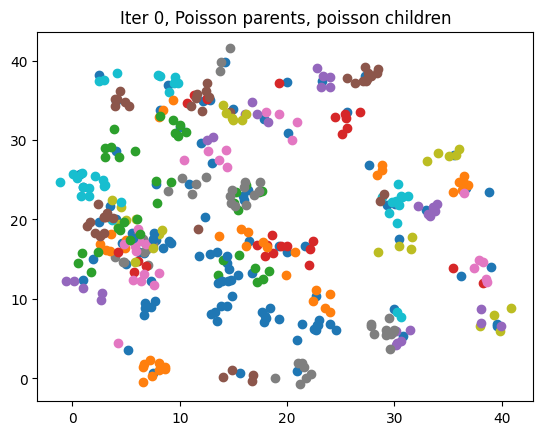

In [15]:
# start code for iter_poisson 
# Iteration 0, get 10% of children
# variables
# xy_parent:                    all parent points from that iter 
# x_history, y_history:         stores x,y position from generated children 

import matplotlib.pyplot as plt 
import numpy as np 

# xy_c = np.array([converted['VES13']['small']['x'], converted['VES13']['small']['y']])
xy_p = np.array([converted['VES13']['large']['x'], converted['VES13']['large']['y']])
# xy_child = np.vstack([xy_c[0], xy_c[1]]).T
xy_parent = np.vstack([xy_p[0], xy_p[1]]).T  # combine points into pattern we use 



# math parameter 
size = xy_p.shape[1]  # self contained data, just load data into xy_p 
n_parent = size  # New parent size inspired from previous 
size = rng.poisson(n_parent)  # random new n_parents 
lam = 5
n_children = rng.poisson(lam=lam, size=size)  # random children per parent, after lam number
save_percent = 0.1 

# Create new parents, iter0 from poisson(size parent points from data)
x_parent = rng.uniform(0,40, size)  # becomes new_ x,y later 
y_parent = rng.uniform(0,40, size)

plt.scatter(x_parent, y_parent)

# log of all child points, not ideal but works. Addition save all points, remove for only childs!
x_history = [x_parent]  
y_history = [y_parent]


for i in range(size):
    x_child = rng.normal(x_parent[i], size=n_children[i])
    y_child = rng.normal(y_parent[i], size=n_children[i])
    # print(len(x_child), len(y_child))
    x_history.append(x_child)
    y_history.append(y_child)
    plt.scatter(x_child, y_child)
    
plt.title('Iter 0, Poisson parents, poisson children');


421


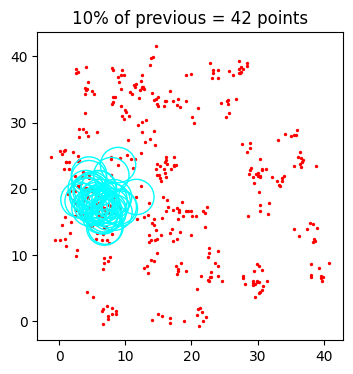

42


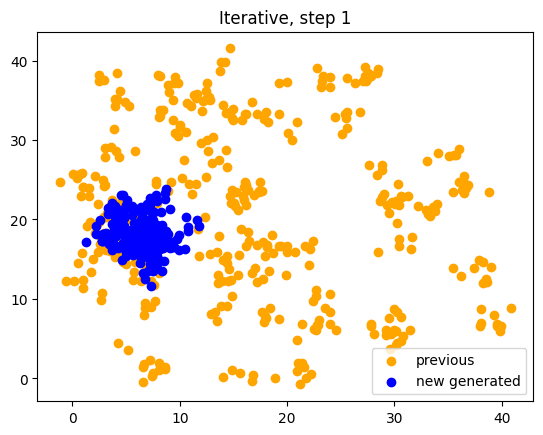

In [16]:
def iter_poisson(outx, outy, lam=5, r_survive=3, iter=0):
    all_points = np.vstack([outx, outy]).T
    x_history=[outx]
    y_history=[outy]

    r_density_survive = r_survive  # default 3 

    count_all = np.array([np.sum(LA.norm((all_points - origin_p), axis=1) <= r_density_survive) for origin_p in all_points])  # take points that survive 
    count_all = count_all - 1  # exclude self
    print(all_points.shape[0]) # should grow, do point accounting
    count_survive = all_points.shape[0]*0.1  # antal % som överlever
    survive_point = heapq.nlargest(int(count_survive), enumerate(count_all.astype(int)), key=lambda x: x[1])
    index=np.array(survive_point)[:,0]


    plt.figure(figsize=(4, 4))
    plt.scatter(all_points[:, 0], all_points[:, 1], color='red', marker='o', s=2)

    fig = plt.gcf()
    ax = fig.gca()

    for i in index:
        circle2 = plt.Circle(all_points[i], r_density_survive/3, color='cyan', lw=1, fill=False)
        ax.add_patch(circle2)

    ax.set_aspect('equal', 'box')
    ax.set_title(f'10% of previous = {index.shape[0]} points')  # use to deduce what lambda should be 

    plt.show()
    
    # broadcast the new points into next model 
    x_new_10_parent = [all_points[index][:,0]]  # picks the index points to generate new children
    y_new_10_parent = [all_points[index][:,1]]

    outx = np.concatenate(x_new_10_parent).ravel().tolist()
    outy = np.concatenate(y_new_10_parent).ravel().tolist()
    new_x = np.array(outx)
    new_y = np.array(outy)
    
    plt.scatter(all_points[:,0], all_points[:,1], color='orange', label='previous')

    print(new_y.shape[0])
    n_children = rng.poisson(lam=lam, size=new_y.shape[0])  # lam = 5 change above, gets new children for new parents 
    for i in range(new_y.shape[0]):
        x_child = rng.normal(new_x[i], size=n_children[i])
        y_child = rng.normal(new_y[i], size=n_children[i])
        x_history.append(x_child)  # add the children to x_history/y_history
        y_history.append(y_child)
        if i == 0:
            plt.scatter(x_child, y_child, color='blue', label='new generated')  # only one legend
        else:
            plt.scatter(x_child, y_child, color='blue')

    plt.title(f'Iterative, step {iter}')
    plt.legend(loc='best')
    
    outx = np.concatenate(x_history).ravel().tolist() # special way to get a list from array
    outy = np.concatenate(y_history).ravel().tolist()
    
    plt.savefig(f'/Users/alexander/Chalmers/MVEX11-25-18/python-fig/iterative{iter}-model.png', format='png', bbox_inches='tight')
    fig.savefig(f'/Users/alexander/Chalmers/MVEX11-25-18/python-fig/inspiration{iter}-iterative.png', format='png', bbox_inches='tight')  # prior inspiration 
    
    return outx, outy


outx0 = np.concatenate(x_history).ravel().tolist() # special way to get a list from array
outy0 = np.concatenate(y_history).ravel().tolist()
outx1, outy1 = iter_poisson(outx0, outy0, r_survive=8, iter=1)

652


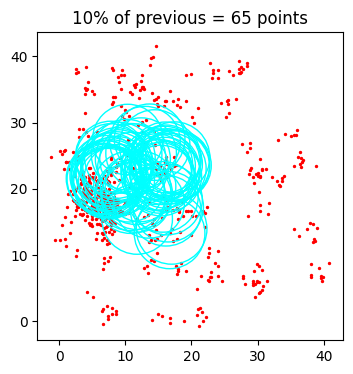

65


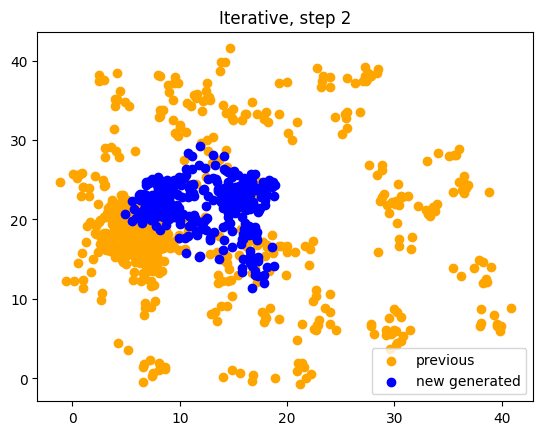

In [17]:
# iter 2 
outx2, outy2 = iter_poisson(outx1, outy1, r_survive=16, iter=2)

962


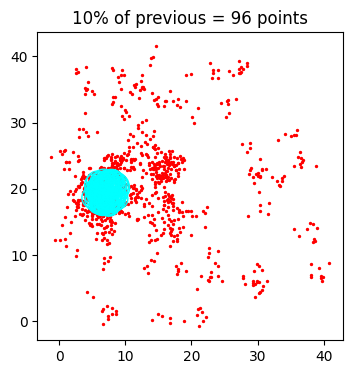

96


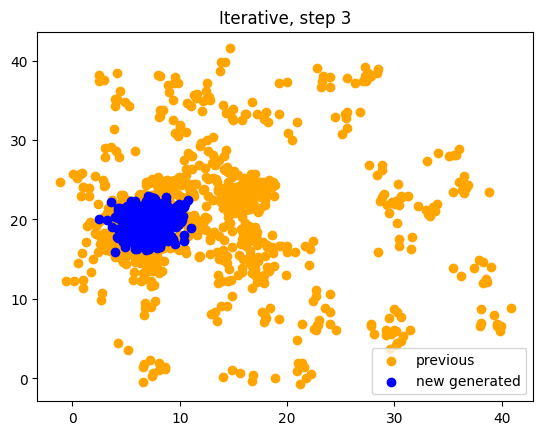

In [18]:
# iter 3 
outx3, outy3 = iter_poisson(outx2, outy2, r_survive=5, iter=3)

In [ ]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

from rpy2.robjects.vectors import StrVector
import rpy2.robjects.packages as rpackages
utils = rpackages.importr('utils')
utils.chooseCRANmirror(ind=1)

# Install packages
# packnames = ('hunspell', 'some other desired packages')
packnames = ('spatstat')
utils.install_packages(StrVector(packnames))

# Import spatstat R module
spatstat = importr('spatstat')

# Create a point pattern
robjects.r('''
library(spatstat.core)
pp <- ppp(runif(100), runif(100), c(0,1), c(0,1))
summary(pp)
''')

In [1]:
from rpy2.robjects.vectors import StrVector
from rpy2.robjects.packages import importr
utils = rpackages.importr('utils')
utils.chooseCRANmirror(ind=1)

# Install packages
packnames = ('hunspell', 'some other desired packages')
utils.install_packages(StrVector(packnames))

: 

In [333]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

# Import spatstat.core
spatstat_core = importr("spatstat")

# Run an example: Generate a Poisson point pattern
robjects.r('''
library(spatstat)
pp <- rpoispp(100)
plot(pp)
''')



In [355]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

# Import spatstat R module
spatstat = importr('spatstat')

# Create a point pattern
x = (robjects.r('''
library(spatstat)
pp <- ppp(runif(100), runif(100), c(0,1), c(0,1))
summary(pp)
ce_x <- clarkevans.test(pp, alternative="clustered")
ce_x

'''))



print(x)


	Clark-Evans test
	Donnelly correction
	Z-test

data:  pp
R = 1.0634, p-value = 0.8972
alternative hypothesis: clustered (R < 1)




In [358]:
x = 1
y = 2
r_sum = robjects.r('sum')  # Get R's sum function
result = r_sum(x, y)
print(result)

[1] 3



In [359]:
import rpy2.robjects as robjects

# Define Python variables
x = [1, 2, 3, 4, 5]
y = [10, 20, 30, 40, 50]

# Convert Python lists to R vectors
r_x = robjects.IntVector(x)
r_y = robjects.IntVector(y)

# Assign variables in R
robjects.globalenv["x"] = r_x
robjects.globalenv["y"] = r_y

# Execute an R command that uses x and y
robjects.r('print(x + y)')  # Element-wise addition in R

[1] 11 22 33 44 55


In [368]:
x = (robjects.r('''
library(spatstat)
pp <- ppp(runif(100), runif(100), c(0,1), c(0,1))
summary(pp)
ce_x <- clarkevans.test(pp, alternative="clustered")
ce_x

'''))
print(x)


	Clark-Evans test
	Donnelly correction
	Z-test

data:  pp
R = 0.91108, p-value = 0.03781
alternative hypothesis: clustered (R < 1)




In [380]:
outx3, outy3

r_x = robjects.IntVector(outx3)
r_y = robjects.IntVector(outy3)

# Assign variables in R
robjects.globalenv["xx"] = r_x
robjects.globalenv["yy"] = r_y


x = (robjects.r('''
library(spatstat)

pp <- ppp(xx, yy, c(0,40), c(0,40))
ce_x <- clarkevans.test(pp, alternative="clustered")
ce_x
'''))



# print(x)
# for i,val in enumerate(x):
#     print(i,val)
    
print(x[0])

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 3 points were rejected as lying outside the specified window 

R[write to console]: 2: data contain duplicated points 



        R 
0.2839587 



In [383]:
x = (robjects.r('''
library(spatstat)

pp <- ppp(xx, yy, c(0,40), c(0,40))
K <- Kest(pp, correction="Ripley")
ce_x <- clarkevans.test(pp, alternative="clustered")
ce_x
K$theo
'''))

print(x)

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 3 points were rejected as lying outside the specified window 

R[write to console]: 2: data contain duplicated points 



  [1] 0.000000e+00 1.198422e-03 4.793690e-03 1.078580e-02 1.917476e-02
  [6] 2.996056e-02 4.314321e-02 5.872270e-02 7.669904e-02 9.707222e-02
 [11] 1.198422e-01 1.450091e-01 1.725728e-01 2.025334e-01 2.348908e-01
 [16] 2.696451e-01 3.067962e-01 3.463441e-01 3.882889e-01 4.326305e-01
 [21] 4.793690e-01 5.285043e-01 5.800365e-01 6.339655e-01 6.902914e-01
 [26] 7.490141e-01 8.101336e-01 8.736500e-01 9.395632e-01 1.007873e+00
 [31] 1.078580e+00 1.151684e+00 1.227185e+00 1.305082e+00 1.385376e+00
 [36] 1.468068e+00 1.553156e+00 1.640640e+00 1.730522e+00 1.822801e+00
 [41] 1.917476e+00 2.014548e+00 2.114017e+00 2.215883e+00 2.320146e+00
 [46] 2.426806e+00 2.535862e+00 2.647315e+00 2.761165e+00 2.877412e+00
 [51] 2.996056e+00 3.117097e+00 3.240534e+00 3.366369e+00 3.494600e+00
 [56] 3.625228e+00 3.758253e+00 3.893675e+00 4.031493e+00 4.171709e+00
 [61] 4.314321e+00 4.459330e+00 4.606736e+00 4.756539e+00 4.908739e+00
 [66] 5.063335e+00 5.220328e+00 5.379719e+00 5.541506e+00 5.705689e+00
 [71] 

In [385]:
for i in robjects.r('K$theo'):
    print(i)

0.0
0.0011984224905356572
0.004793689962142629
0.010785802414820914
0.019174759848570515
0.02996056226339143
0.04314320965928366
0.0587227020362472
0.07669903939428206
0.09707222173338823
0.11984224905356572
0.14500912135481453
0.17257283863713463
0.20253340090052607
0.2348908081449888
0.2696450603705229
0.30679615757712825
0.3463440997648049
0.3882888869335529
0.43263051908337224
0.4793689962142629
0.5285043183262248
0.5800364854192581
0.6339654974933626
0.6902913545485385
0.7490140565847857
0.8101336036021043
0.8736499956004941
0.9395632325799552
1.0078733145404877
1.0785802414820915
1.1516840134047666
1.227184630308513
1.3050820921933306
1.3853763990592196
1.46806755090618
1.5531555477342116
1.6406403895433146
1.730522076333489
1.8228006081047345
1.9174759848570515
2.01454820659044
2.114017273304899
2.21588318500043
2.3201459416770325
2.4268055433347056
2.5358619899734505
2.647315281593267
2.761165418194154
2.8774123997761127
2.996056226339143
3.1170968978832443
3.240534414408417
3.

[20.02071536 15.86389516]


(array([  1.,   5.,   6.,   8.,   9.,  16.,  15.,   8.,  13.,  19.,  27.,
         32.,  40.,  40.,  25.,  38.,  84., 126., 169., 217., 156., 109.,
         70.,  40.,  34.,  25.,  28.,  18.,  11.,  18.,  17.,   9.,   7.,
          7.,   8.,   5.,   1.,   1.,   1.,   3.]),
 array([ 0.        ,  0.7080704 ,  1.4161408 ,  2.1242112 ,  2.8322816 ,
         3.540352  ,  4.2484224 ,  4.95649281,  5.66456321,  6.37263361,
         7.08070401,  7.78877441,  8.49684481,  9.20491521,  9.91298561,
        10.62105601, 11.32912641, 12.03719681, 12.74526721, 13.45333762,
        14.16140802, 14.86947842, 15.57754882, 16.28561922, 16.99368962,
        17.70176002, 18.40983042, 19.11790082, 19.82597122, 20.53404162,
        21.24211202, 21.95018243, 22.65825283, 23.36632323, 24.07439363,
        24.78246403, 25.49053443, 26.19860483, 26.90667523, 27.61474563,
        28.32281603]),
 <BarContainer object of 40 artists>)

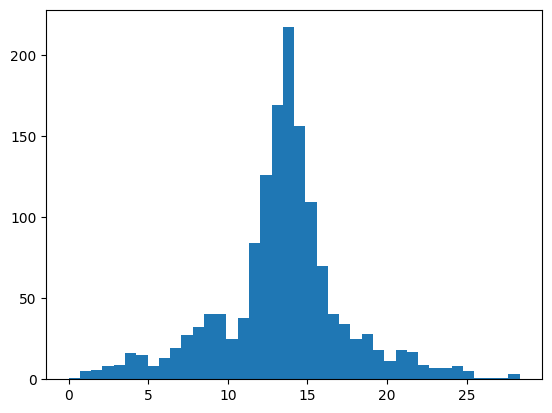

In [19]:
# Iterativ med färre döttrar. Ta slumpmässigt. 
import numpy as np 
import matplotlib.pyplot as plt 

xy_c = np.array([converted['VES13']['small']['x'], converted['VES13']['small']['y']])
xy_p = np.array([converted['VES13']['large']['x'], converted['VES13']['large']['y']])
xy_child = np.vstack([xy_c[0], xy_c[1]]).T
xy_parent = np.vstack([xy_p[0], xy_p[1]]).T


points = np.vstack([outx3, outy3]).T

point = points[0]
print(point)



# outx3[0], outy3[0]
# print(outx3.shape)
r = LA.norm((points - point), axis=1)

# LA.norm((all_points - point), axis=1)




plt.hist(r, bins=40)

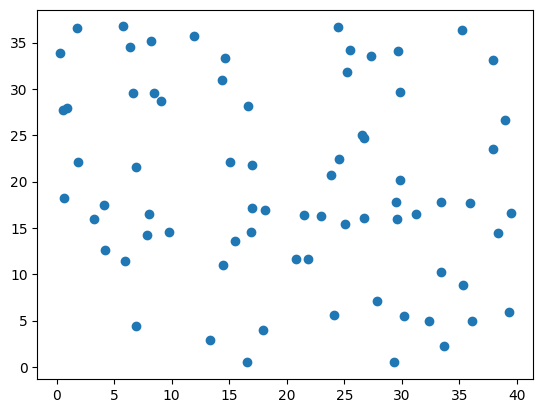

In [99]:
rng = np.random.default_rng()

n_parent = len(xy_parent)  # original parent have 74
size = rng.poisson(n_parent)  # random new n_parents 
lam = 5
n_children = rng.poisson(lam=lam, size=size)  # random children per parent, after lam number

len(n_children), n_children

# set parent location 
x_parent = rng.uniform(0,40, size)
y_parent = rng.uniform(0,40, size)

plt.scatter(x_parent, y_parent)

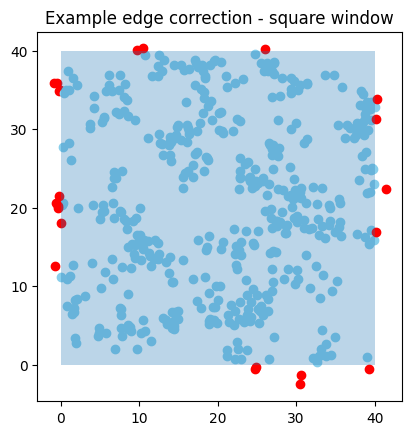

In [21]:
# Example picture
import numpy as np 
# variables
# xy_parent:                    all parent points from that iter 
# x_history, y_history:         stores x,y position from generated children 
# 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.colors as clrs

# xy_c = np.array([converted['VES13']['small']['x'], converted['VES13']['small']['y']])
xy_p = np.array([converted['VES13']['large']['x'], converted['VES13']['large']['y']])
# xy_child = np.vstack([xy_c[0], xy_c[1]]).T
xy_parent = np.vstack([xy_p[0], xy_p[1]]).T  # combine points into pattern we use 



# math parameter 
size = xy_p.shape[1]  # self contained data, just load data into xy_p 
n_parent = size  # New parent size inspired from previous 
size = rng.poisson(n_parent)  # random new n_parents 
lam = 5
n_children = rng.poisson(lam=lam, size=size)  # random children per parent, after lam number
save_percent = 0.1 

# Create new parents, iter0 from poisson(size parent points from data)
x_parent = rng.uniform(0,40, size)  # becomes new_ x,y later 
y_parent = rng.uniform(0,40, size)

# plt.scatter(x_parent, y_parent)

# log of all child points, not ideal but works. Addition save all points, remove for only childs!
x_history = [x_parent]  
y_history = [y_parent]




fig, ax = plt.subplots(1,1)
for i in range(size):
    x_child = rng.normal(x_parent[i], size=n_children[i])
    y_child = rng.normal(y_parent[i], size=n_children[i])
    # print(len(x_child), len(y_child))
    x_history.append(x_child)
    y_history.append(y_child)
    
    all_points = np.vstack([x_child, y_child]).T

    cmap = clrs.ListedColormap(['red', 'skyblue'])
    bool_win = (all_points <= 40) & (all_points >= 0)  # instead of xlim ylim
    bool_new = bool_win[:, 0] == bool_win[:,1]
    
    bool_inv  = [not elem for elem in bool_new]
    
    
    ax.scatter(all_points[:,0][bool_new], all_points[:,1][bool_new], c='skyblue')
    ax.scatter(all_points[:,0][(bool_inv)], all_points[:,1][(bool_inv)], c='red')
    # ax.scatter(x_child, y_child, c = 'red')
    
ax.add_patch(plt.Rectangle((0,0),40,40,alpha=0.3))

# circle 
circle2 = plt.Circle((0,0), 3, color='red', lw=1, fill=False, alpha=1)
# ax.add_patch(circle2)
    
ax.set_title('Example edge correction - square window');
ax.set_aspect('equal')
# fig.savefig('/Users/alexander/Chalmers/MVEX11-25-18/python-fig/edge-correcton.png', format='png', bbox_inches='tight')

# bool_win =   # instead of xlim ylim
# bool_new = bool_win[:, 0] == bool_win[:,1]
# points_win = points[bool_new]

In [97]:
# fig.savefig('/Users/alexander/Chalmers/MVEX11-25-18/python-fig/ves13-thomasprocess-all-compare.eps', format='eps', bbox_inches='tight')
fig.savefig('/Users/alexander/Chalmers/MVEX11-25-18/python-fig/edge-correcton.png', format='png', bbox_inches='tight')

AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

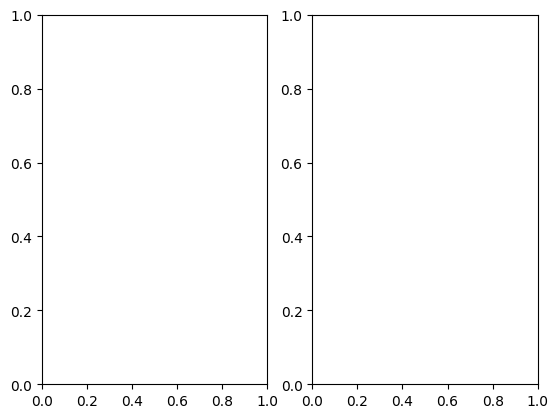

In [22]:
fig, ax = plt.subplots(1,2)

for i in range(2):
    cmap = clrs.ListedColormap(['red', 'skyblue'])
    bool_win = (all_points <= 40) & (all_points >= 0)  # instead of xlim ylim
    bool_new = bool_win[:, 0] == bool_win[:,1]
    
    bool_inv  = [not elem for elem in bool_new]
    
    
    ax.scatter(all_points[:,0][bool_new], all_points[:,1][bool_new], c='skyblue')
    ax.scatter(all_points[:,0][(bool_inv)], all_points[:,1][(bool_inv)], c='red')


In [ ]:
# bool_win =   # instead of xlim ylim

all_points = np.vstack([x_child, y_child]).T


bool_win = (all_points <= 40) & (all_points >= 0)  # instead of xlim ylim
bool_new = bool_win[:, 0] == bool_win[:,1]
points_win = all_points[bool_new]



[False, True, False, False, False, False, False, False]

AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

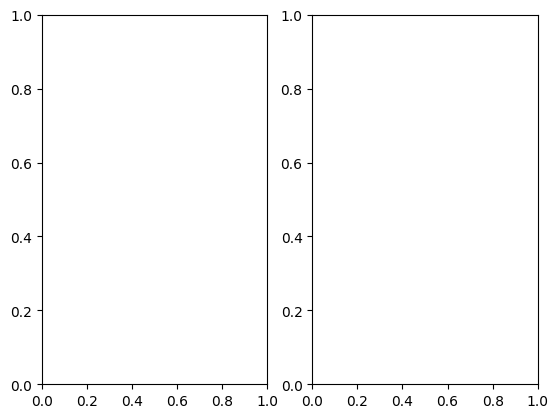

In [ ]:
# Example edge correction > second step 
import numpy as np 
# variables
# xy_parent:                    all parent points from that iter 
# x_history, y_history:         stores x,y position from generated children 
# 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.colors as clrs

# xy_c = np.array([converted['VES13']['small']['x'], converted['VES13']['small']['y']])
xy_p = np.array([converted['VES13']['large']['x'], converted['VES13']['large']['y']])
# xy_child = np.vstack([xy_c[0], xy_c[1]]).T
xy_parent = np.vstack([xy_p[0], xy_p[1]]).T  # combine points into pattern we use 


# math parameter 
size = xy_p.shape[1]  # self contained data, just load data into xy_p 
n_parent = size  # New parent size inspired from previous 
size = rng.poisson(n_parent)  # random new n_parents 
lam = 5
n_children = rng.poisson(lam=lam, size=size)  # random children per parent, after lam number
save_percent = 0.1 

# Create new parents, iter0 from poisson(size parent points from data)
x_parent = rng.uniform(0,40, size)  # becomes new_ x,y later 
y_parent = rng.uniform(0,40, size)

# plt.scatter(x_parent, y_parent)

# log of all child points, not ideal but works. Addition save all points, remove for only childs!
x_history = [x_parent]  
y_history = [y_parent]


fig, ax = plt.subplots(1,2)
for i in range(size):
    x_child = rng.normal(x_parent[i], size=n_children[i])
    y_child = rng.normal(y_parent[i], size=n_children[i])
    # print(len(x_child), len(y_child))
    x_history.append(x_child)
    y_history.append(y_child)
    
    all_points = np.vstack([x_child, y_child]).T

    cmap = clrs.ListedColormap(['red', 'skyblue'])
    bool_win = (all_points <= 40) & (all_points >= 0)  # instead of xlim ylim
    bool_new = bool_win[:, 0] == bool_win[:,1]
    
    bool_inv  = [not elem for elem in bool_new]
    
    
    ax.scatter(all_points[:,0][bool_new], all_points[:,1][bool_new], c='skyblue')
    ax.scatter(all_points[:,0][(bool_inv)], all_points[:,1][(bool_inv)], c='red')
    # ax.scatter(x_child, y_child, c = 'red')
  
    
for i in range(2):
    cmap = clrs.ListedColormap(['red', 'skyblue'])
    bool_win = (all_points <= 40) & (all_points >= 0)  # instead of xlim ylim
    bool_new = bool_win[:, 0] == bool_win[:,1]
    
    bool_inv  = [not elem for elem in bool_new]
    
    
    ax.scatter(all_points[:,0][bool_new], all_points[:,1][bool_new], c='skyblue')
    ax.scatter(all_points[:,0][(bool_inv)], all_points[:,1][(bool_inv)], c='red')

   
ax.add_patch(plt.Rectangle((0,0),40,40,alpha=0.3))

# circle 
circle2 = plt.Circle((0,0), 3, color='red', lw=1, fill=False, alpha=1)

ax.set_title('Example edge correction - square window');
ax.set_aspect('equal')
# fig.savefig('/Users/alexander/Chalmers/MVEX11-25-18/python-fig/edge-correcton.png', format='png', bbox_inches='tight')

# bool_win =   # instead of xlim ylim
# bool_new = bool_win[:, 0] == bool_win[:,1]
# points_win = points[bool_new]

87

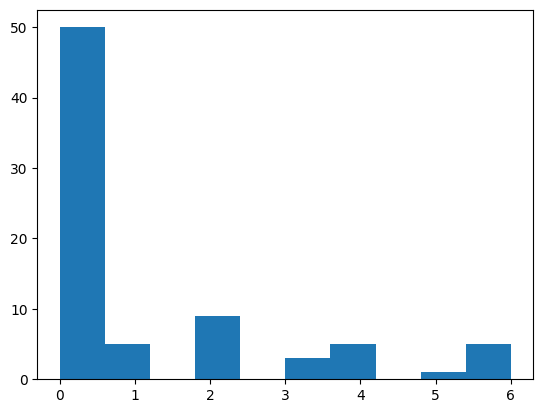

In [ ]:
hist = []
for i in range(78):
    hist.append(rng.poisson(rng.poisson(rng.poisson(1))))

hist = np.array(hist)

plt.hist(hist)

np.sum(hist)

573


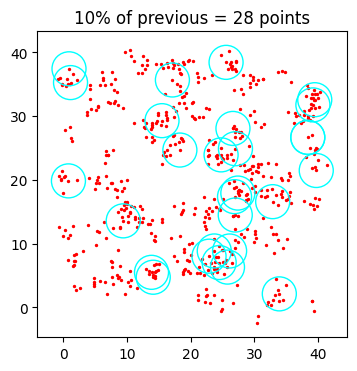

28


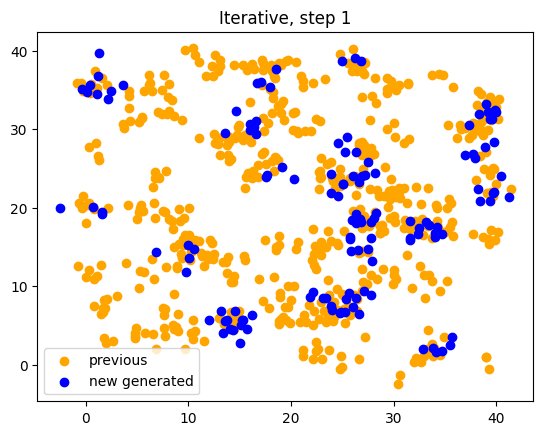

In [95]:
## Ändra iterativ till att ta random föräldrar

def iter_poisson_unif(outx, outy, lam=5, r_survive=3, iter=0):
    all_points = np.vstack([outx, outy]).T
    # outx = np.array(outx)
    # outy = np.array(outy)
    x_history=[outx]
    y_history=[outy]

    r_density_survive = r_survive  # default 3 

    count_all = np.array([np.sum(LA.norm((all_points - origin_p), axis=1) <= r_density_survive) for origin_p in all_points])  # take points that survive 
    count_all = count_all - 1  # exclude self
    print(all_points.shape[0]) # should grow, do point accounting
    # count_survive = all_points.shape[0]*0.1  # antal % som överlever
    # survive_point = heapq.nlargest(int(count_survive), enumerate(count_all.astype(int)), key=lambda x: x[1])
    # index=np.array(survive_point)[:,0]
    
    size_unif = int(np.array(outx).shape[0]*0.05)
    index = np.random.randint(0,all_points.shape[0], size=size_unif)  # 
    



    plt.figure(figsize=(4, 4))
    plt.scatter(all_points[:, 0], all_points[:, 1], color='red', marker='o', s=2)

    fig = plt.gcf()
    ax = fig.gca()

    for i in index:
        circle2 = plt.Circle(all_points[i], r_density_survive/3, color='cyan', lw=1, fill=False)
        ax.add_patch(circle2)

    ax.set_aspect('equal', 'box')
    ax.set_title(f'10% of previous = {index.shape[0]} points')  # use to deduce what lambda should be 

    plt.show()
    
    # broadcast the new points into next model 
    x_new_10_parent = [all_points[index][:,0]]  # picks the index points to generate new children
    y_new_10_parent = [all_points[index][:,1]]

    outx = np.concatenate(x_new_10_parent).ravel().tolist()
    outy = np.concatenate(y_new_10_parent).ravel().tolist()
    new_x = np.array(outx)
    new_y = np.array(outy)
    
    plt.scatter(all_points[:,0], all_points[:,1], color='orange', label='previous')

    print(new_y.shape[0])
    n_children = rng.poisson(lam=lam, size=new_y.shape[0])  # lam = 5 change above, gets new children for new parents 
    for i in range(new_y.shape[0]):
        x_child = rng.normal(new_x[i], size=n_children[i])
        y_child = rng.normal(new_y[i], size=n_children[i])
        x_history.append(x_child)  # add the children to x_history/y_history
        y_history.append(y_child)
        if i == 0:
            plt.scatter(x_child, y_child, color='blue', label='new generated')  # only one legend
        else:
            plt.scatter(x_child, y_child, color='blue')

    plt.title(f'Iterative, step {iter}')
    plt.legend(loc='best')
    
    outx = np.concatenate(x_history).ravel().tolist() # special way to get a list from array
    outy = np.concatenate(y_history).ravel().tolist()
    
    plt.savefig(f'/Users/alexander/Chalmers/MVEX11-25-18/python-fig/uinf-iterative{iter}-model.png', format='png', bbox_inches='tight')
    fig.savefig(f'/Users/alexander/Chalmers/MVEX11-25-18/python-fig/uinf-inspiration{iter}-iterative.png', format='png', bbox_inches='tight')  # prior inspiration 
    
    return outx, outy


outx0 = np.concatenate(x_history).ravel().tolist() # special way to get a list from array
outy0 = np.concatenate(y_history).ravel().tolist()
outx1, outy1 = iter_poisson_unif(outx0, outy0, r_survive=8, iter=1)

In [92]:
outx3

all_points = np.vstack([outx3, outy3]).T

all_points.shape[0]

# np.random.sample(all_points, size=5, axis=1)

index_survive = np.random.randint(0,all_points.shape[0], size=100)
# pl = np.random.sample(all_points, 5)
# print(pl)

728


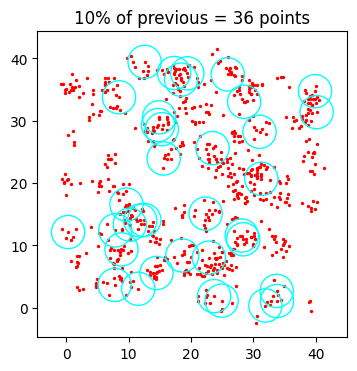

36


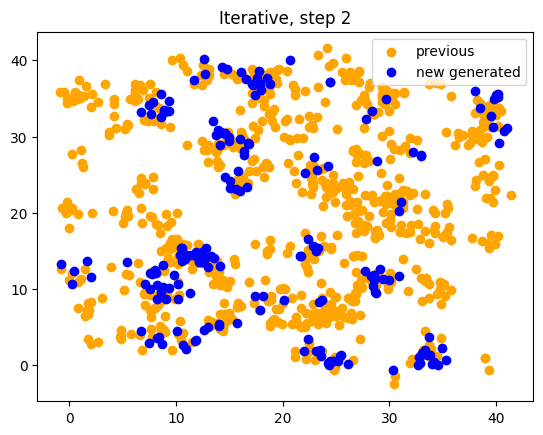

In [93]:
outx2, outy2 = iter_poisson_unif(outx1, outy1, r_survive=8, iter=2)

916


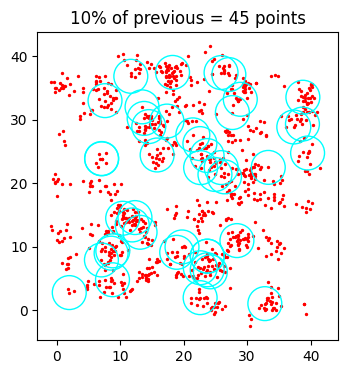

45


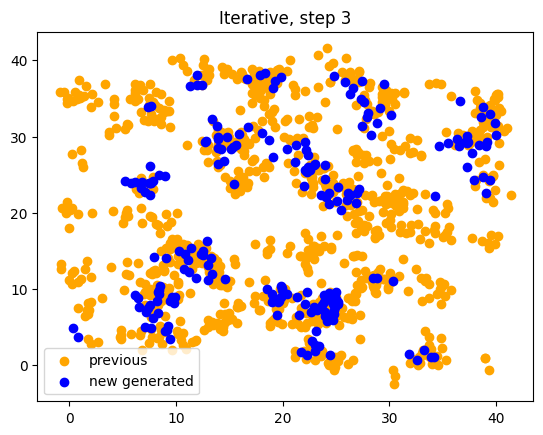

In [94]:
outx3, outy3 = iter_poisson_unif(outx2, outy2, r_survive=8, iter=3)

In [90]:
count_points = np.vstack([outx3, outy3]).T

count_points.shape

(1907, 2)

85


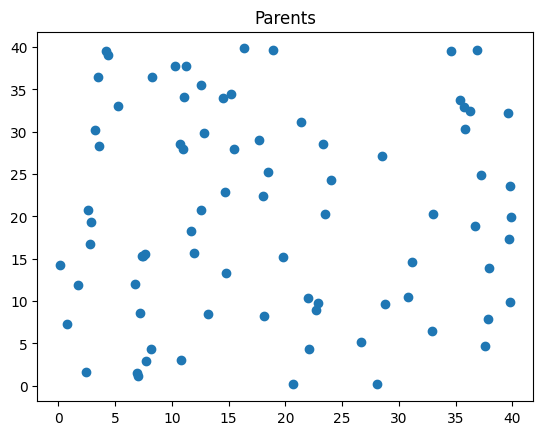

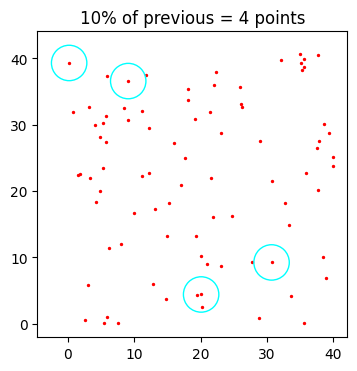

4
103


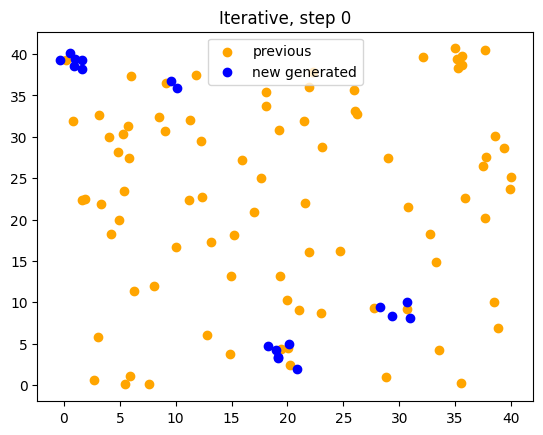

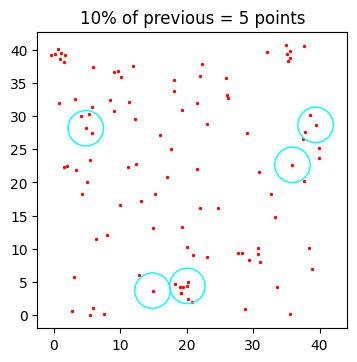

5
130


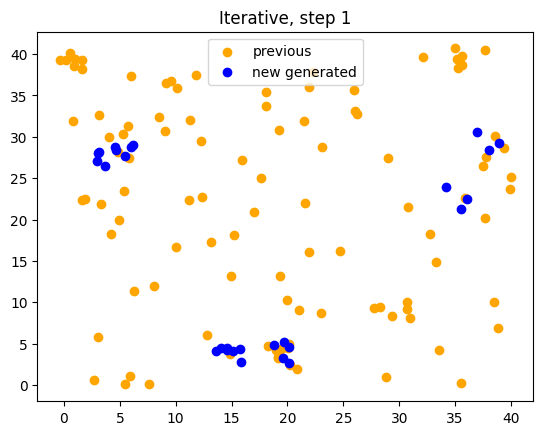

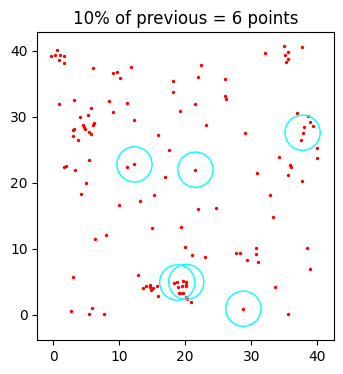

6
163


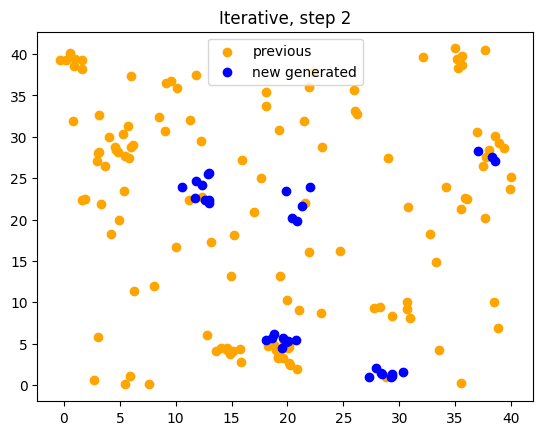

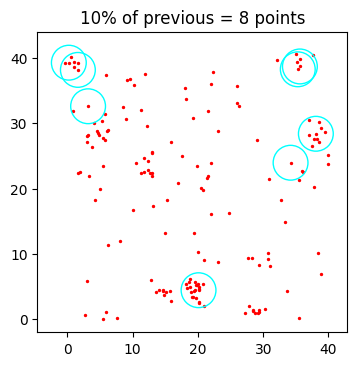

8
210


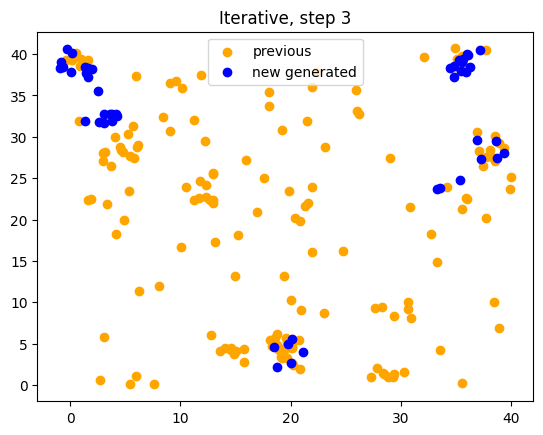

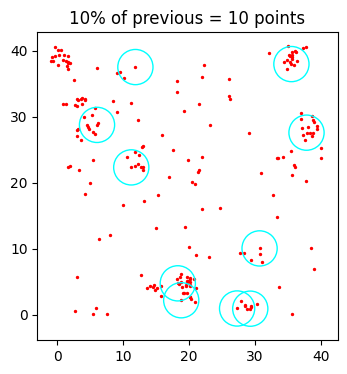

10
281


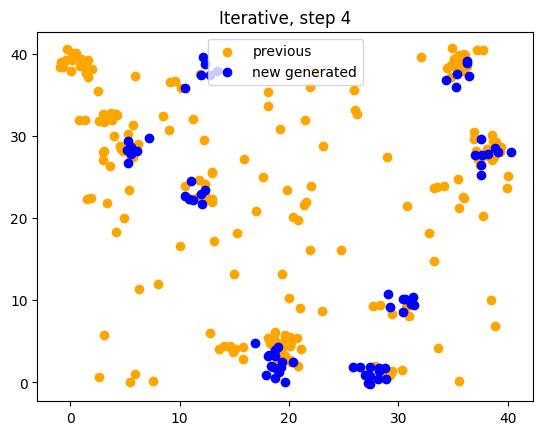

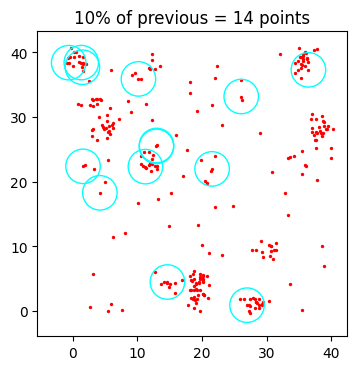

14
349


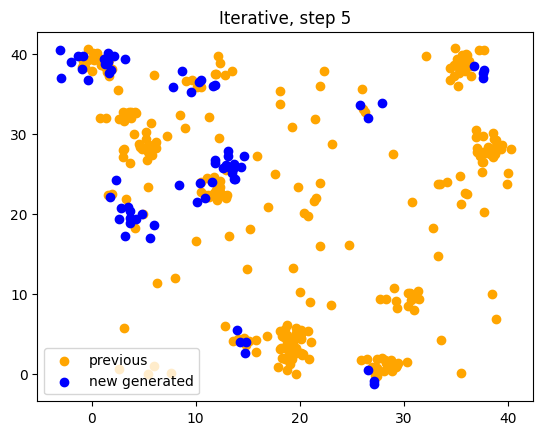

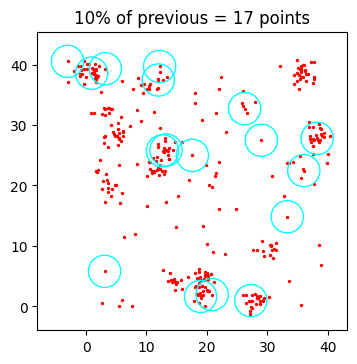

17
426


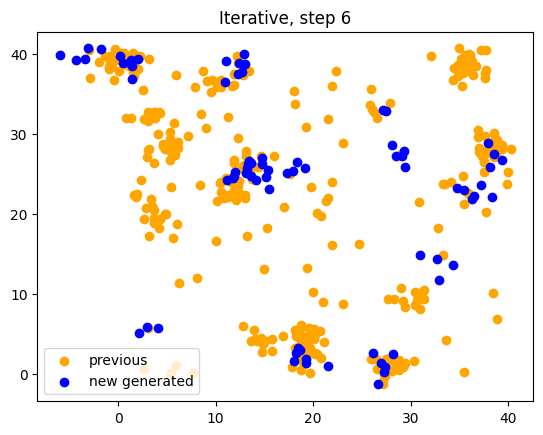

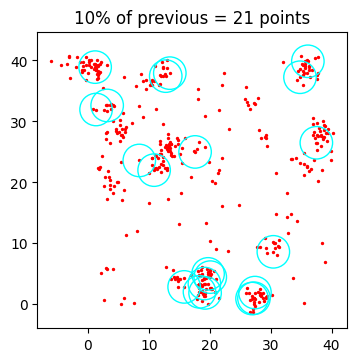

21
529


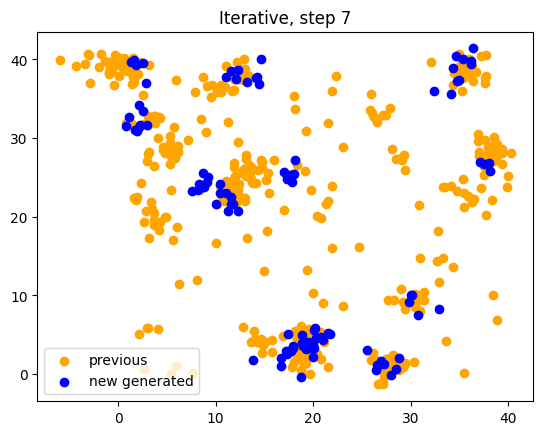

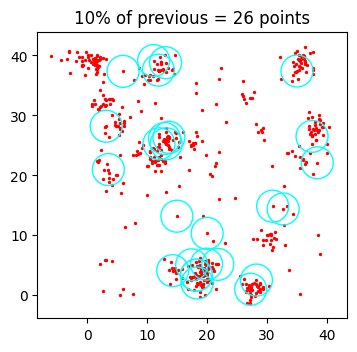

26
647


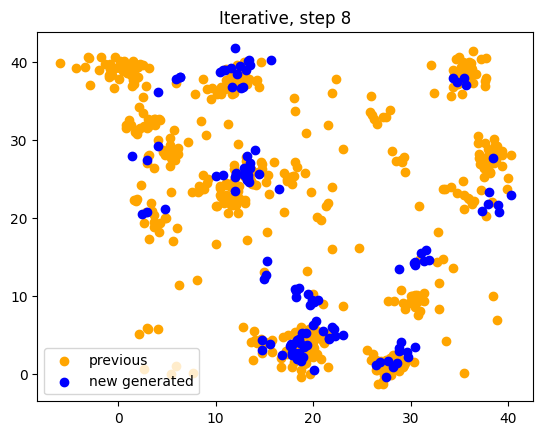

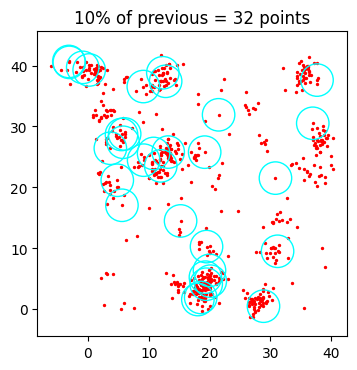

32
785


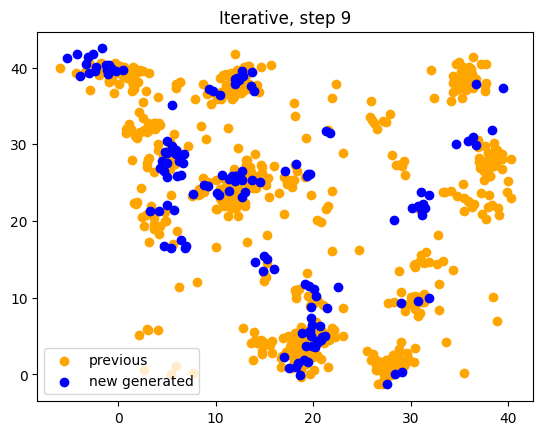

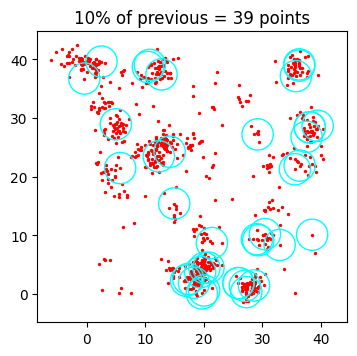

39


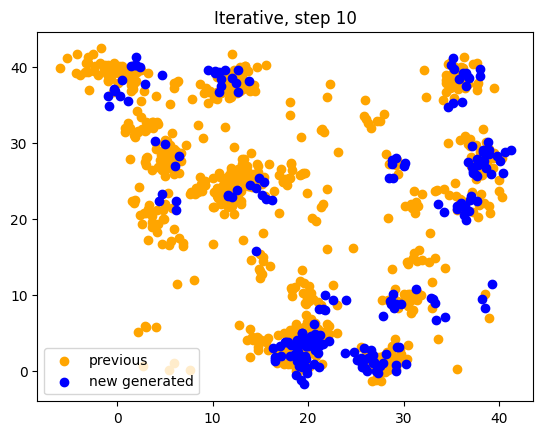

In [105]:
rng = np.random.default_rng()

n_parent = len(xy_parent)  # original parent have 74
size = rng.poisson(n_parent)  # random new n_parents 
lam = 5
n_children = rng.poisson(lam=lam, size=size)  # random children per parent, after lam number

len(n_children), n_children

# set parent location 
x_parent = rng.uniform(0,40, size)
y_parent = rng.uniform(0,40, size)

outx = np.concatenate(x_history).ravel().tolist() # special way to get a list from array
outy = np.concatenate(y_history).ravel().tolist()

plt.scatter(x_parent, y_parent)
plt.title('Parents')

# Plot iterplot
save_points={}
maxiter = 11
for i in range(maxiter):
    outx, outy = iter_poisson_unif(outx, outy, r_survive=8, iter=i)
    save_points[i] = [outx,outy]

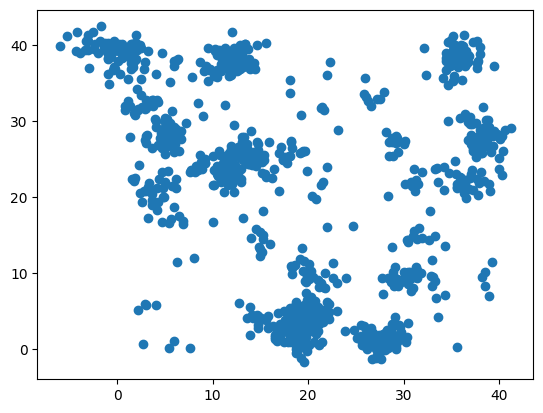

In [109]:
plt.scatter(outx,outy)

data = np.vstack([outx,outy]).T

import pandas as pd 

df = pd.DataFrame(data)

df.to_csv('/Users/alexander/Chalmers/MVEX11-25-18/dataframes/unif-iter10.csv', index=False, header=False)

done


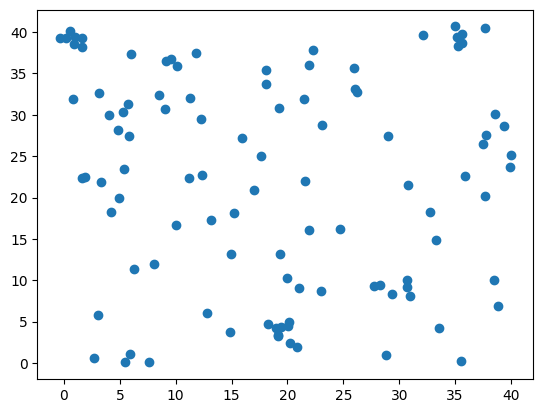

In [134]:
import pandas as pd 
np.array(save_points[0]).shape

np.array(save_points[0])[1]
slic = [0,5,10]
snip_p = np.vstack([np.array(save_points[0])[0], np.array(save_points[0])[1]]).T

plt.scatter(snip_p[:,0], snip_p[:,1])

for i in slic:
    snip_pdata = np.vstack([np.array(save_points[i])[0], np.array(save_points[i])[1]]).T
    df = pd.DataFrame(snip_pdata)
    df.to_csv(f'/Users/alexander/Chalmers/MVEX11-25-18/dataframes/unif-iter{i}-aut.csv', index=False, header=False)

print('done')

In [ ]:
facecolors='none', edgecolors='black'

85


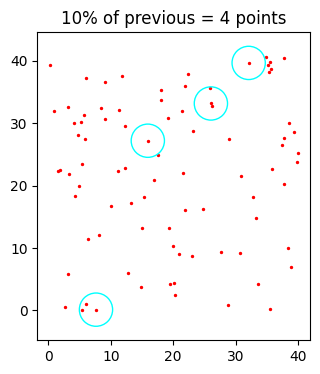

4


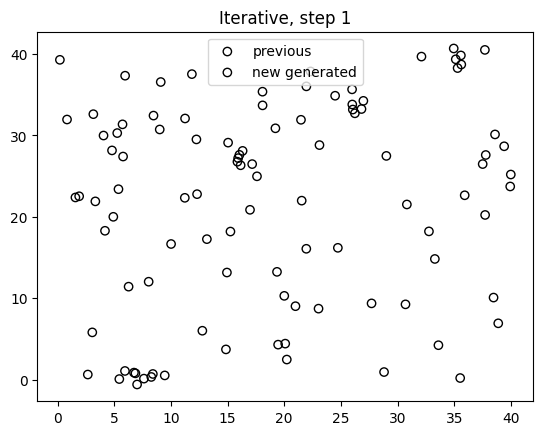

In [137]:
## Ändra iterativ till att ta random föräldrar

def iter_poisson_unif_circles(outx, outy, lam=5, r_survive=3, iter=0):
    all_points = np.vstack([outx, outy]).T
    # outx = np.array(outx)
    # outy = np.array(outy)
    x_history=[outx]
    y_history=[outy]

    r_density_survive = r_survive  # default 3 

    count_all = np.array([np.sum(LA.norm((all_points - origin_p), axis=1) <= r_density_survive) for origin_p in all_points])  # take points that survive 
    count_all = count_all - 1  # exclude self
    print(all_points.shape[0]) # should grow, do point accounting
    # count_survive = all_points.shape[0]*0.1  # antal % som överlever
    # survive_point = heapq.nlargest(int(count_survive), enumerate(count_all.astype(int)), key=lambda x: x[1])
    # index=np.array(survive_point)[:,0]
    
    size_unif = int(np.array(outx).shape[0]*0.05)
    index = np.random.randint(0,all_points.shape[0], size=size_unif)  # 
    



    plt.figure(figsize=(4, 4))
    plt.scatter(all_points[:, 0], all_points[:, 1], color='red', marker='o', s=2)

    fig = plt.gcf()
    ax = fig.gca()

    for i in index:
        circle2 = plt.Circle(all_points[i], r_density_survive/3, color='cyan', lw=1, fill=False)
        ax.add_patch(circle2)

    ax.set_aspect('equal', 'box')
    ax.set_title(f'10% of previous = {index.shape[0]} points')  # use to deduce what lambda should be 

    plt.show()
    
    # broadcast the new points into next model 
    x_new_10_parent = [all_points[index][:,0]]  # picks the index points to generate new children
    y_new_10_parent = [all_points[index][:,1]]

    outx = np.concatenate(x_new_10_parent).ravel().tolist()
    outy = np.concatenate(y_new_10_parent).ravel().tolist()
    new_x = np.array(outx)
    new_y = np.array(outy)
    
    plt.scatter(all_points[:,0], all_points[:,1], color='orange', label='previous', facecolors='none', edgecolors='black')

    print(new_y.shape[0])
    n_children = rng.poisson(lam=lam, size=new_y.shape[0])  # lam = 5 change above, gets new children for new parents 
    for i in range(new_y.shape[0]):
        x_child = rng.normal(new_x[i], size=n_children[i])
        y_child = rng.normal(new_y[i], size=n_children[i])
        x_history.append(x_child)  # add the children to x_history/y_history
        y_history.append(y_child)
        if i == 0:
            plt.scatter(x_child, y_child, label='new generated', facecolors='none', edgecolors='black')  # only one legend
        else:
            plt.scatter(x_child, y_child, facecolors='none', edgecolors='black')

    plt.title(f'Iterative, step {iter}')
    plt.legend(loc='best')
    
    outx = np.concatenate(x_history).ravel().tolist() # special way to get a list from array
    outy = np.concatenate(y_history).ravel().tolist()
    
    plt.savefig(f'/Users/alexander/Chalmers/MVEX11-25-18/python-fig/uinf-iterative{iter}-model.png', format='png', bbox_inches='tight')
    fig.savefig(f'/Users/alexander/Chalmers/MVEX11-25-18/python-fig/uinf-inspiration{iter}-iterative.png', format='png', bbox_inches='tight')  # prior inspiration 
    
    return outx, outy


outx0 = np.concatenate(x_history).ravel().tolist() # special way to get a list from array
outy0 = np.concatenate(y_history).ravel().tolist()
outx1, outy1 = iter_poisson_unif_circles(outx0, outy0, r_survive=8, iter=1)

85


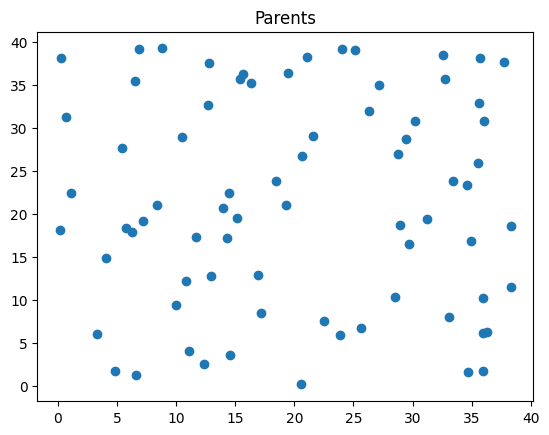

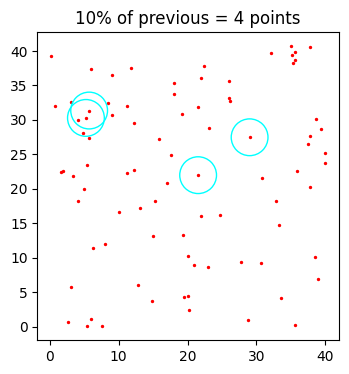

4
109


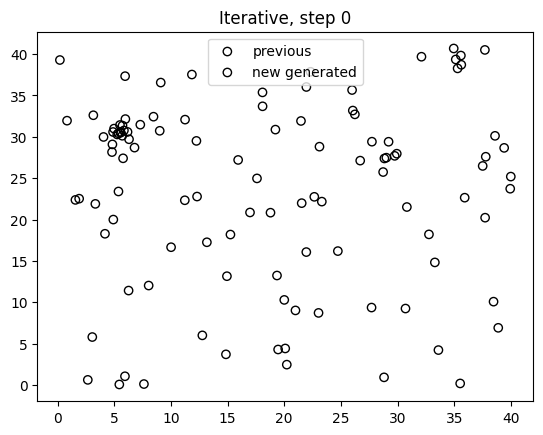

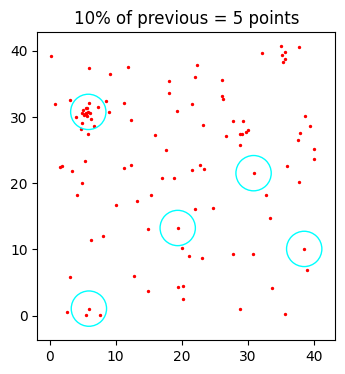

5
137


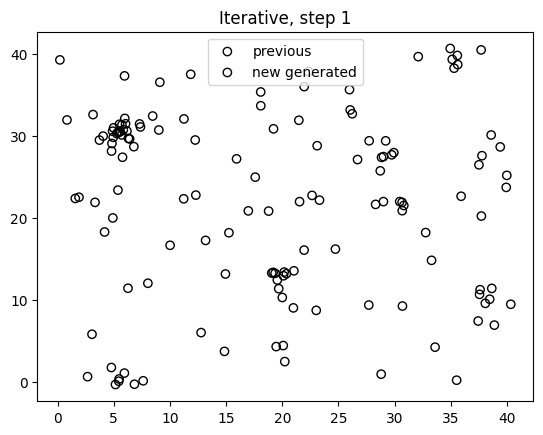

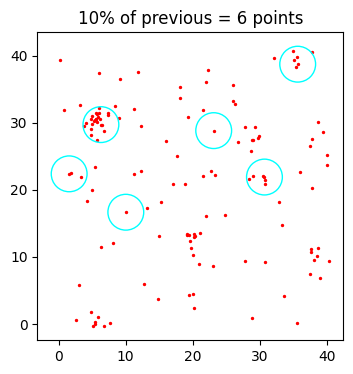

6
169


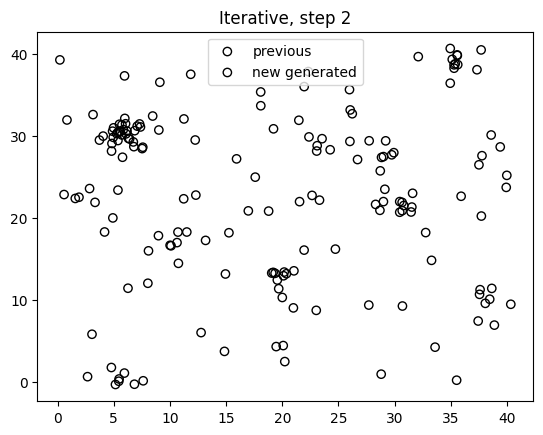

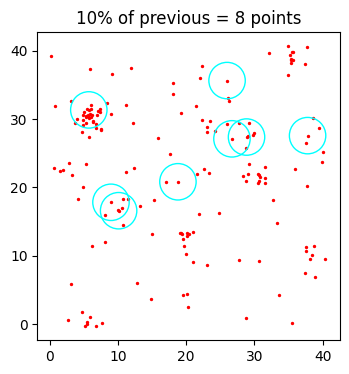

8
204


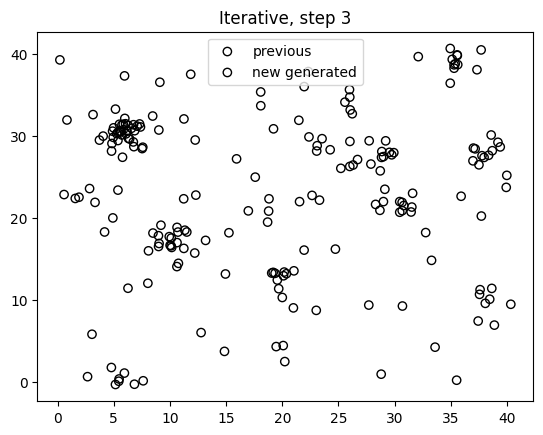

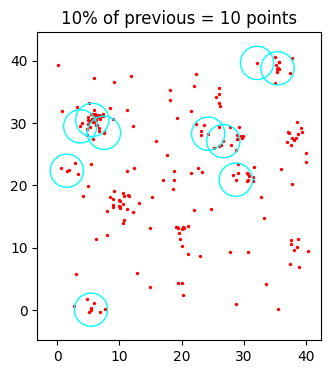

10
271


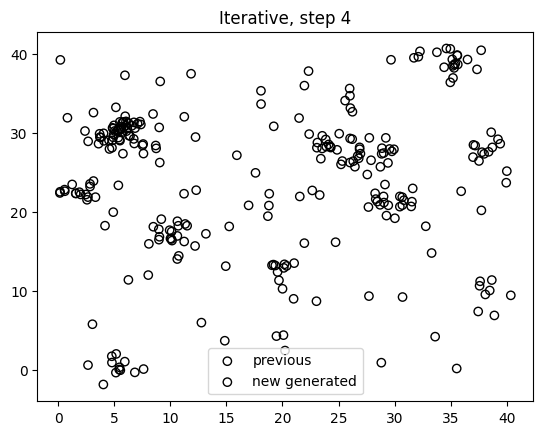

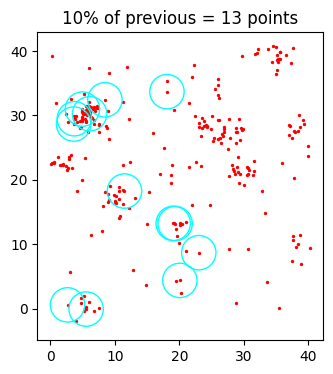

13
332


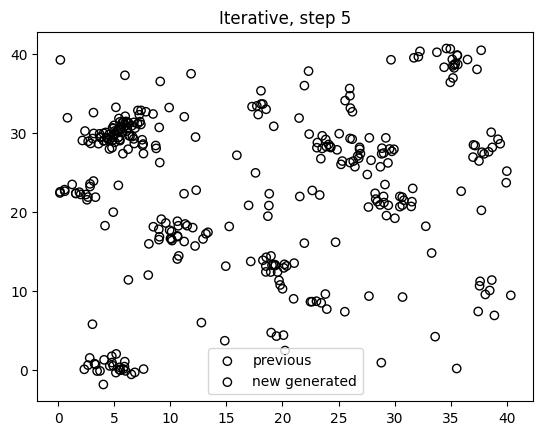

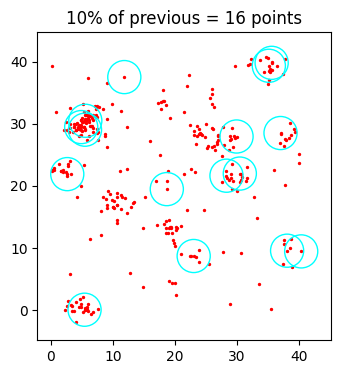

16
405


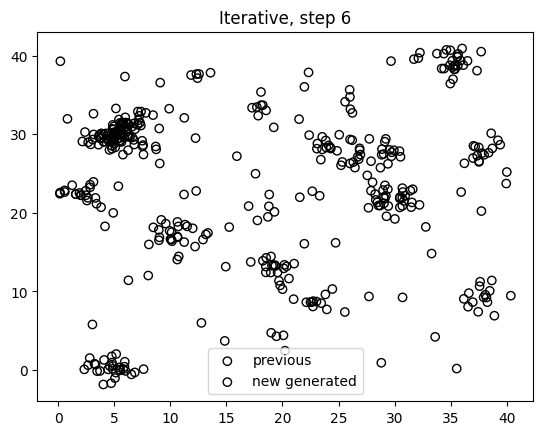

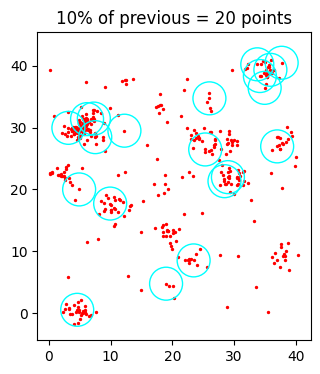

20
521


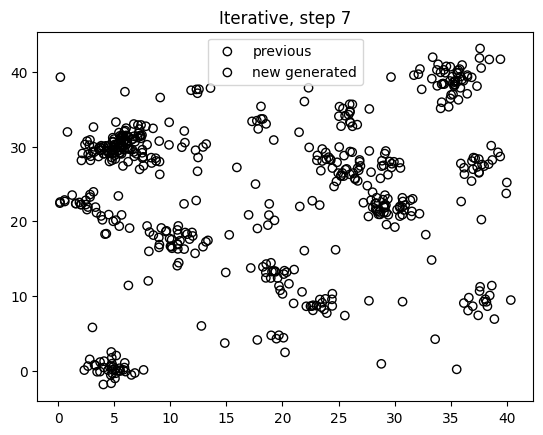

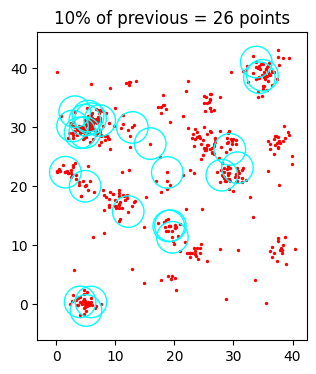

26
670


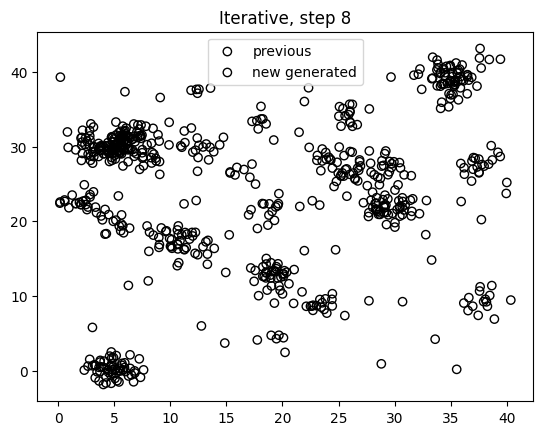

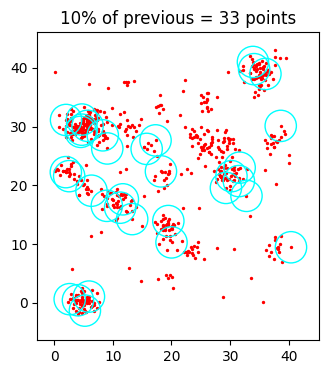

33
831


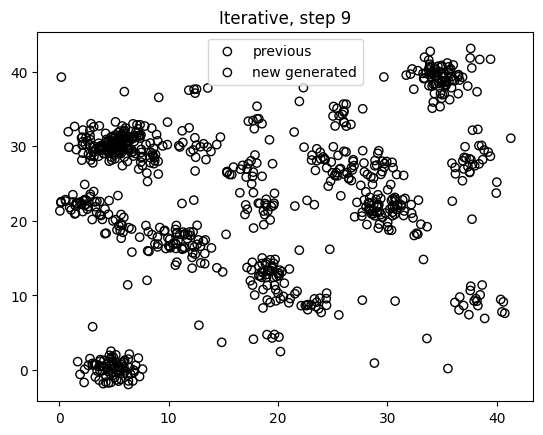

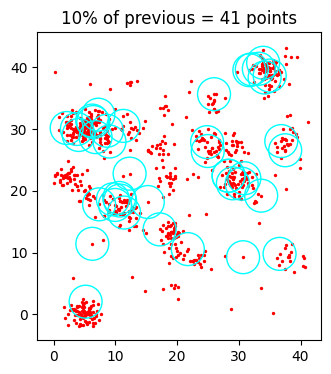

41


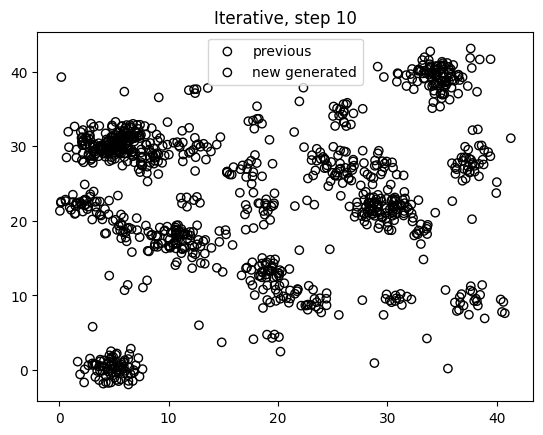

In [138]:
rng = np.random.default_rng()

n_parent = len(xy_parent)  # original parent have 74
size = rng.poisson(n_parent)  # random new n_parents 
lam = 5
n_children = rng.poisson(lam=lam, size=size)  # random children per parent, after lam number

len(n_children), n_children

# set parent location 
x_parent = rng.uniform(0,40, size)
y_parent = rng.uniform(0,40, size)

outx = np.concatenate(x_history).ravel().tolist() # special way to get a list from array
outy = np.concatenate(y_history).ravel().tolist()

plt.scatter(x_parent, y_parent)
plt.title('Parents')

# Plot iterplot
save_points={}
maxiter = 11
for i in range(maxiter):
    outx, outy = iter_poisson_unif_circles(outx, outy, r_survive=8, iter=i)
    save_points[i] = [outx,outy]